## EXP_2389_seq_prune_0_4_128_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
round0 [2 8 3 9]
2
Epoch 1/5
1250/1250 - 2s - loss: 0.0353 - accuracy: 0.9879 - val_loss: 0.0444 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 2s - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.0200 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 2s - loss: 1.2361e-04 - accuracy: 0.9999 - val_loss: 0.0470 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 2s - loss: 3.8109e-06 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 2s - loss: 1.2636e-06 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9937


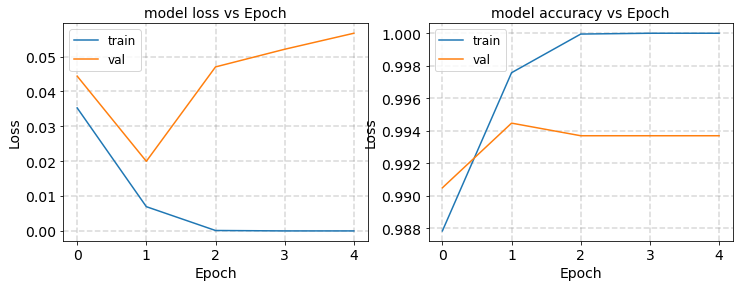

8
Epoch 1/5
1250/1250 - 2s - loss: 0.0831 - accuracy: 0.9793 - val_loss: 0.0423 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 2s - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0525 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 2s - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0573 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 2s - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0609 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 2s - loss: 4.1556e-04 - accuracy: 0.9999 - val_loss: 0.1025 - val_accuracy: 0.9857


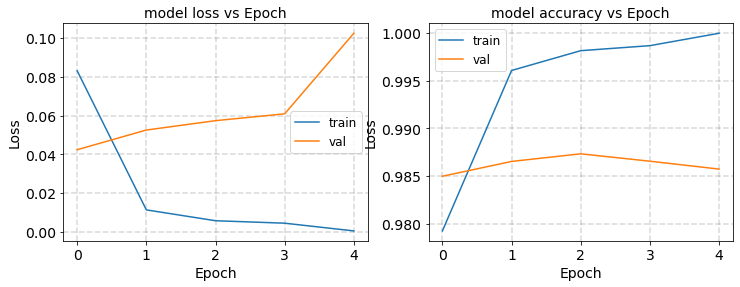

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1029 - accuracy: 0.9741 - val_loss: 0.0635 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 2s - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0972 - val_accuracy: 0.9762
Epoch 3/5
1250/1250 - 2s - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0833 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 2s - loss: 1.3384e-04 - accuracy: 1.0000 - val_loss: 0.1234 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 1.0049e-05 - accuracy: 1.0000 - val_loss: 0.1439 - val_accuracy: 0.9873


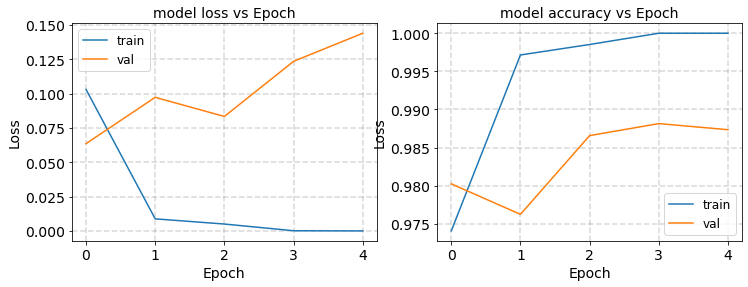

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0844 - accuracy: 0.9825 - val_loss: 0.0519 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 2s - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0867 - val_accuracy: 0.9732
Epoch 3/5
1250/1250 - 2s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0823 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 9.9403e-05 - accuracy: 1.0000 - val_loss: 0.1033 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 1.3341e-05 - accuracy: 1.0000 - val_loss: 0.1278 - val_accuracy: 0.9921


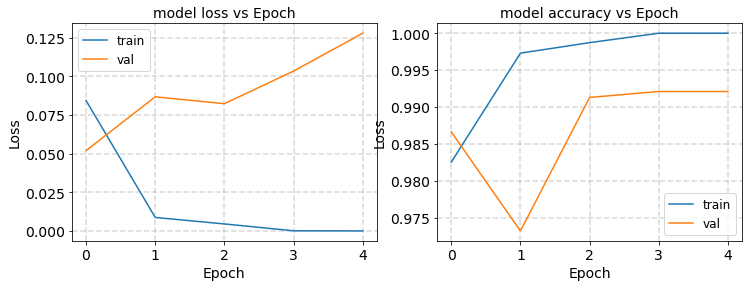

round1 [9 3 8 2]
9
Epoch 1/5
1250/1250 - 2s - loss: 2.5255e-06 - accuracy: 1.0000 - val_loss: 0.1510 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 6.8267e-07 - accuracy: 1.0000 - val_loss: 0.1632 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 2s - loss: 2.7914e-07 - accuracy: 1.0000 - val_loss: 0.1727 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 1.3018e-07 - accuracy: 1.0000 - val_loss: 0.1843 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 2s - loss: 6.4538e-08 - accuracy: 1.0000 - val_loss: 0.1927 - val_accuracy: 0.9929


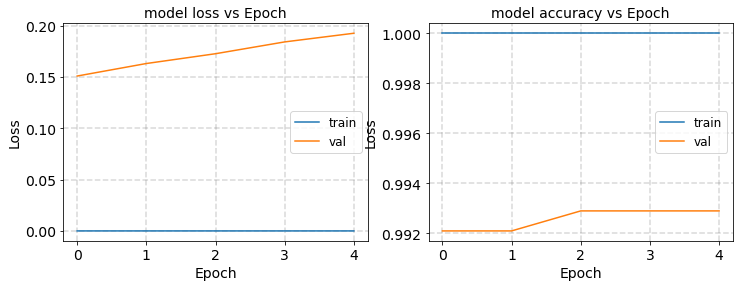

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1310 - accuracy: 0.9801 - val_loss: 0.0697 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 2s - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.1122 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1497 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 2s - loss: 3.3441e-05 - accuracy: 1.0000 - val_loss: 0.2210 - val_accuracy: 0.9810
Epoch 5/5
1250/1250 - 2s - loss: 4.9909e-06 - accuracy: 1.0000 - val_loss: 0.2516 - val_accuracy: 0.9810


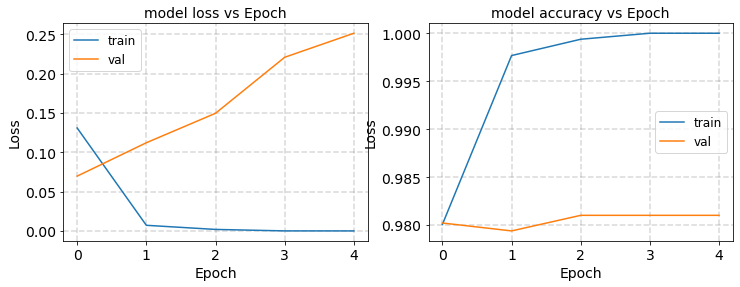

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1159 - accuracy: 0.9804 - val_loss: 0.0517 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 2s - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.0566 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 2s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0472 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 2s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0584 - val_accuracy: 0.9817
Epoch 5/5
1250/1250 - 3s - loss: 7.7263e-04 - accuracy: 0.9998 - val_loss: 0.0903 - val_accuracy: 0.9857


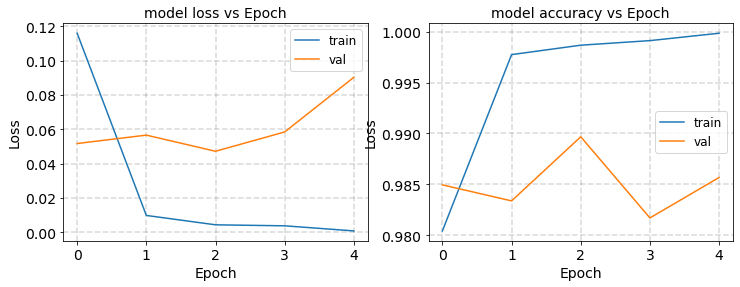

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0988 - accuracy: 0.9849 - val_loss: 0.0614 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 3s - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0514 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0567 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 6.9120e-05 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 1.9402e-05 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9929


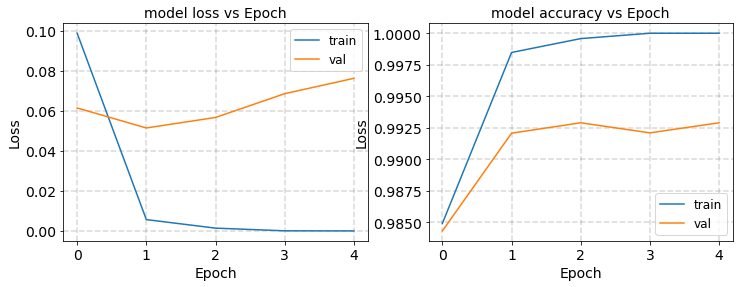

round2 [3 2 8 9]
3
Epoch 1/5
1250/1250 - 2s - loss: 0.1160 - accuracy: 0.9768 - val_loss: 0.0542 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 2s - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0704 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 2s - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0867 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.1857 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 2s - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0901 - val_accuracy: 0.9890


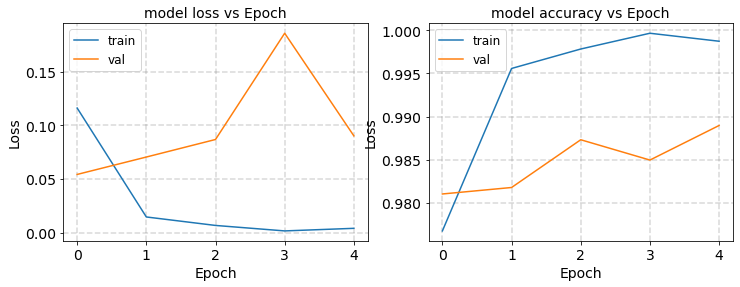

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0848 - accuracy: 0.9803 - val_loss: 0.0433 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 2s - loss: 0.0082 - accuracy: 0.9979 - val_loss: 0.0442 - val_accuracy: 0.9920
Epoch 3/5
1250/1250 - 2s - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0662 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 2s - loss: 4.4653e-04 - accuracy: 0.9999 - val_loss: 0.0714 - val_accuracy: 0.9912
Epoch 5/5
1250/1250 - 2s - loss: 1.3065e-05 - accuracy: 1.0000 - val_loss: 0.0827 - val_accuracy: 0.9912


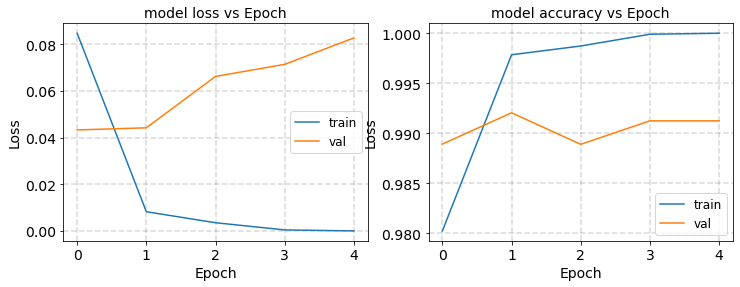

8
Epoch 1/5
1250/1250 - 2s - loss: 0.0861 - accuracy: 0.9819 - val_loss: 0.0828 - val_accuracy: 0.9762
Epoch 2/5
1250/1250 - 2s - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.1223 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 2s - loss: 2.3803e-04 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 2s - loss: 2.1688e-05 - accuracy: 1.0000 - val_loss: 0.1585 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 2s - loss: 4.6539e-06 - accuracy: 1.0000 - val_loss: 0.1813 - val_accuracy: 0.9850


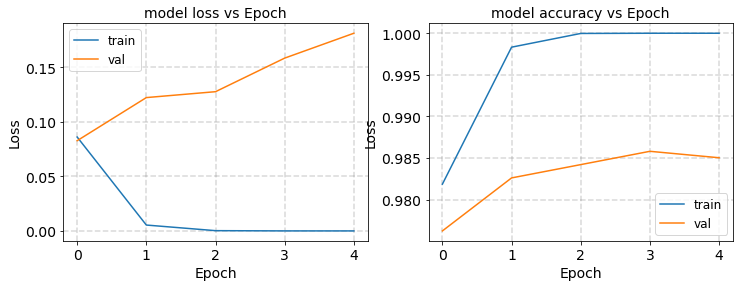

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0807 - accuracy: 0.9866 - val_loss: 0.0745 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 2s - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0869 - val_accuracy: 0.9827
Epoch 3/5
1250/1250 - 2s - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.1168 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 2s - loss: 2.4003e-04 - accuracy: 1.0000 - val_loss: 0.1317 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 2s - loss: 1.4510e-05 - accuracy: 1.0000 - val_loss: 0.1638 - val_accuracy: 0.9850


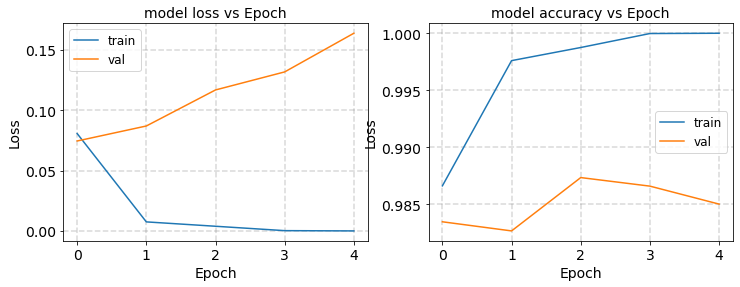

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
________________________________________________

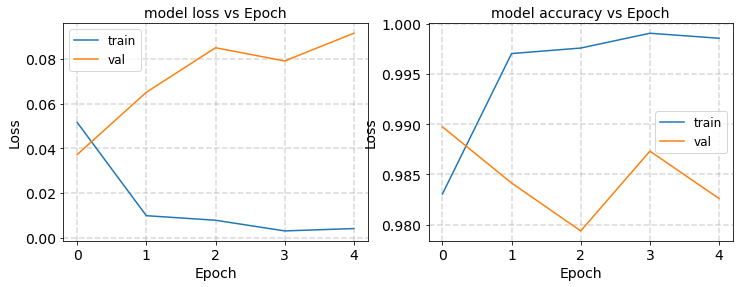

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0504 - accuracy: 0.9882 - val_loss: 0.0414 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0329 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0420 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0356 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.2240e-05 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 0.9929


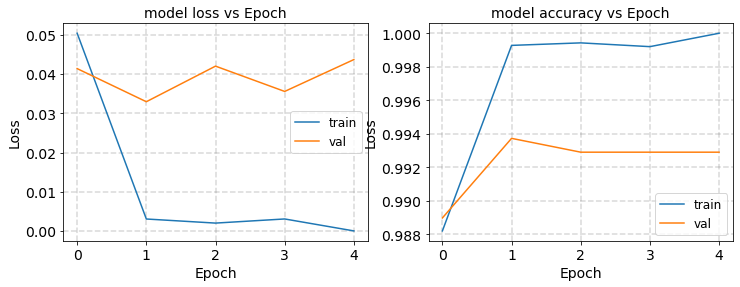

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0767 - accuracy: 0.9855 - val_loss: 0.0490 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0568 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 4s - loss: 1.5721e-05 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 3.2264e-06 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 1.0058e-06 - accuracy: 1.0000 - val_loss: 0.0803 - val_accuracy: 0.9937


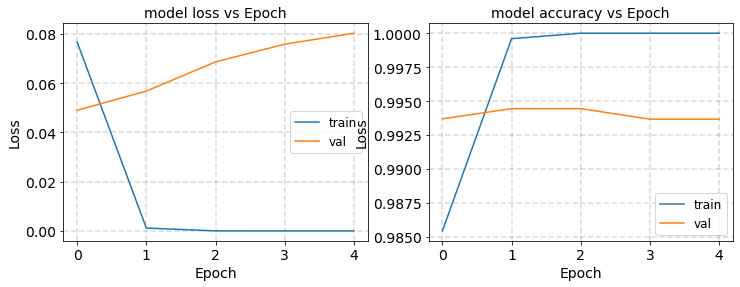

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0793 - accuracy: 0.9837 - val_loss: 0.0366 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 4s - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0782 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0519 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0892 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.1240 - val_accuracy: 0.9858


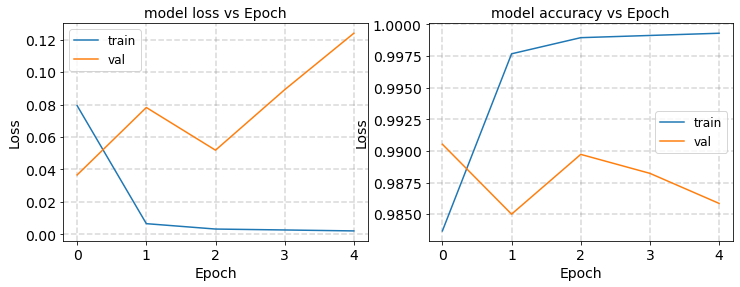

round1 [2 3 9 8]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0867 - accuracy: 0.9845 - val_loss: 0.0552 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0461 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 5.3504e-04 - accuracy: 0.9998 - val_loss: 0.0728 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 1.1876e-04 - accuracy: 0.9999 - val_loss: 0.0857 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 6.9115e-05 - accuracy: 1.0000 - val_loss: 0.0968 - val_accuracy: 0.9929


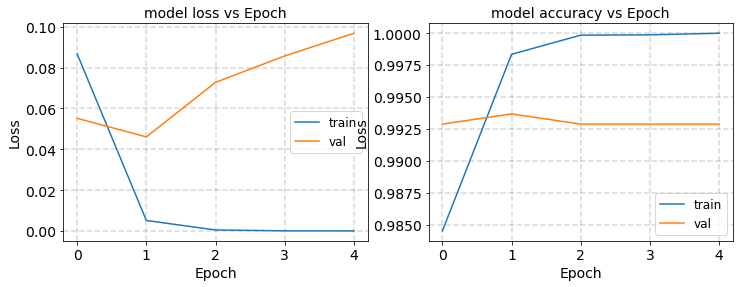

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1264 - accuracy: 0.9694 - val_loss: 0.0655 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0106 - accuracy: 0.9980 - val_loss: 0.0815 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.0976 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.1137 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 1.2500e-04 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9858


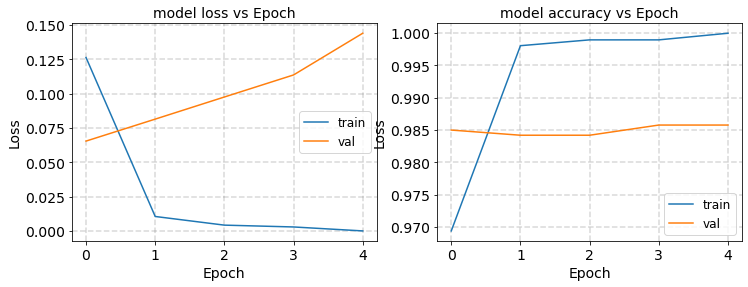

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0620 - accuracy: 0.9883 - val_loss: 0.0487 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0431 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 6.6488e-05 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 3.9440e-06 - accuracy: 1.0000 - val_loss: 0.0798 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 1.1800e-06 - accuracy: 1.0000 - val_loss: 0.0908 - val_accuracy: 0.9898


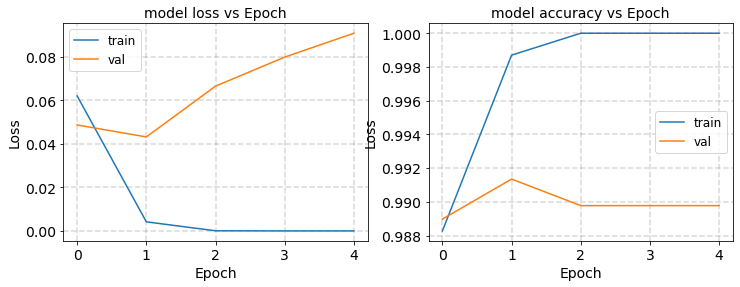

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0958 - accuracy: 0.9818 - val_loss: 0.0413 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0343 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0429 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 7.3871e-05 - accuracy: 1.0000 - val_loss: 0.0491 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 1.8822e-05 - accuracy: 1.0000 - val_loss: 0.0548 - val_accuracy: 0.9890


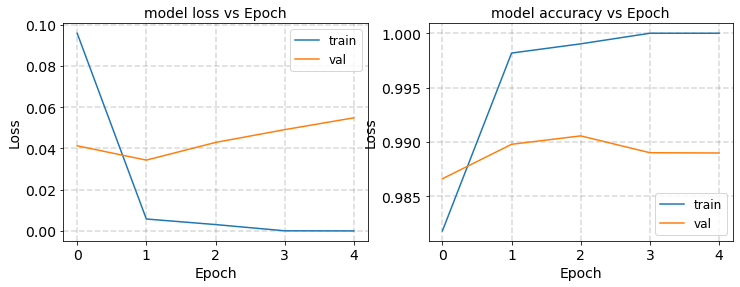

round2 [9 2 3 8]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.0597 - accuracy: 0.9908 - val_loss: 0.0552 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 2.3286e-04 - accuracy: 0.9999 - val_loss: 0.0810 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 1.7186e-05 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 5.7761e-06 - accuracy: 1.0000 - val_loss: 0.1019 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 2.2969e-06 - accuracy: 1.0000 - val_loss: 0.1110 - val_accuracy: 0.9890


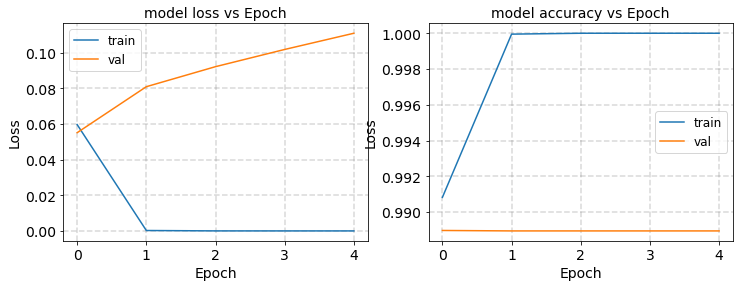

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1507 - accuracy: 0.9827 - val_loss: 0.0429 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0699 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 8.5343e-04 - accuracy: 0.9997 - val_loss: 0.0909 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 4.9212e-05 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 1.2521e-05 - accuracy: 1.0000 - val_loss: 0.1059 - val_accuracy: 0.9874


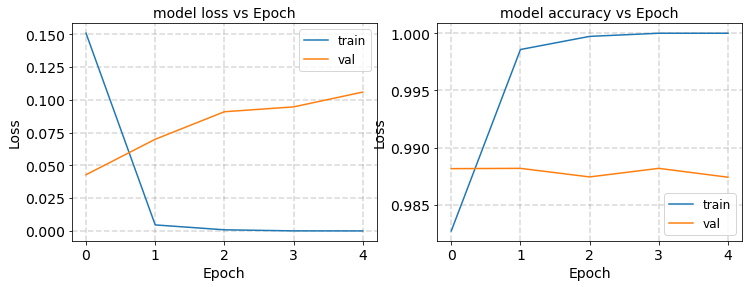

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1165 - accuracy: 0.9794 - val_loss: 0.0829 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 4s - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.1021 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 4s - loss: 7.0923e-04 - accuracy: 0.9998 - val_loss: 0.1165 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 7.1490e-05 - accuracy: 1.0000 - val_loss: 0.1426 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 6.0841e-06 - accuracy: 1.0000 - val_loss: 0.1552 - val_accuracy: 0.9858


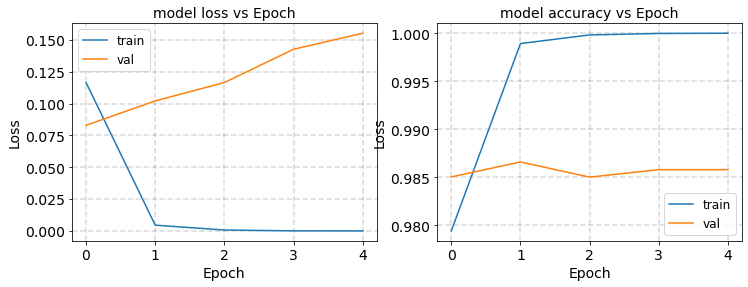

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0937 - accuracy: 0.9841 - val_loss: 0.0613 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 4s - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0719 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 4s - loss: 6.7747e-04 - accuracy: 0.9998 - val_loss: 0.0890 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 2.6192e-05 - accuracy: 1.0000 - val_loss: 0.1126 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 6.3001e-06 - accuracy: 1.0000 - val_loss: 0.1341 - val_accuracy: 0.9874


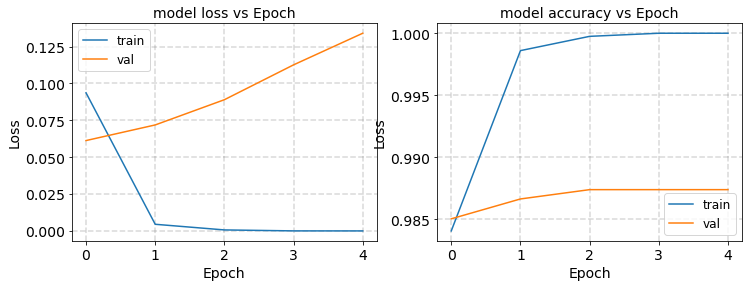

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
________________________________________________

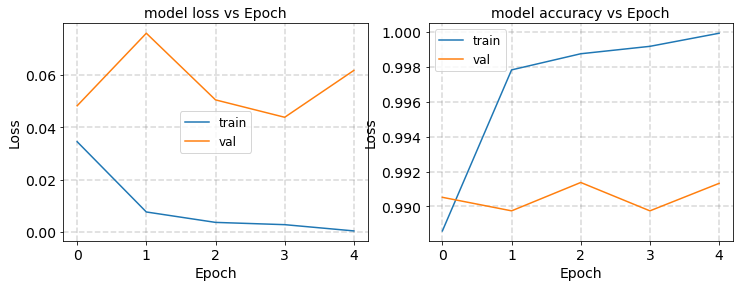

8
Epoch 1/5
1250/1250 - 2s - loss: 0.0765 - accuracy: 0.9797 - val_loss: 0.0548 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 2s - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0847 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 2s - loss: 1.9706e-04 - accuracy: 0.9999 - val_loss: 0.1028 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 2s - loss: 2.4220e-06 - accuracy: 1.0000 - val_loss: 0.1224 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 2s - loss: 5.2059e-07 - accuracy: 1.0000 - val_loss: 0.1343 - val_accuracy: 0.9866


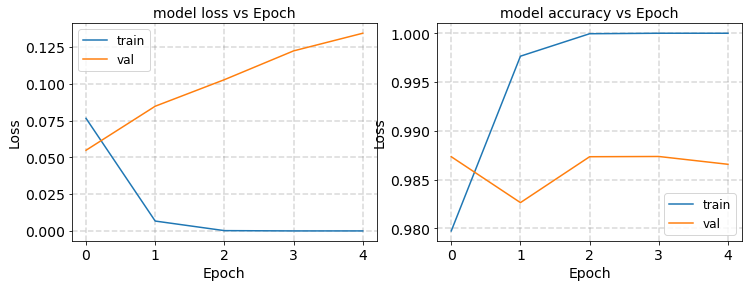

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0821 - accuracy: 0.9862 - val_loss: 0.0307 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0387 - val_accuracy: 0.9952
Epoch 3/5
1250/1250 - 2s - loss: 1.1643e-04 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 2s - loss: 9.3520e-06 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 2s - loss: 3.3984e-06 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9952


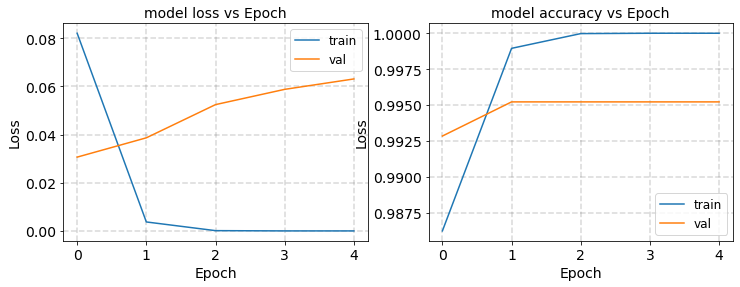

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1071 - accuracy: 0.9773 - val_loss: 0.0604 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 2s - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0712 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.1009 - val_accuracy: 0.9786
Epoch 4/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.1140 - val_accuracy: 0.9802
Epoch 5/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1115 - val_accuracy: 0.9873


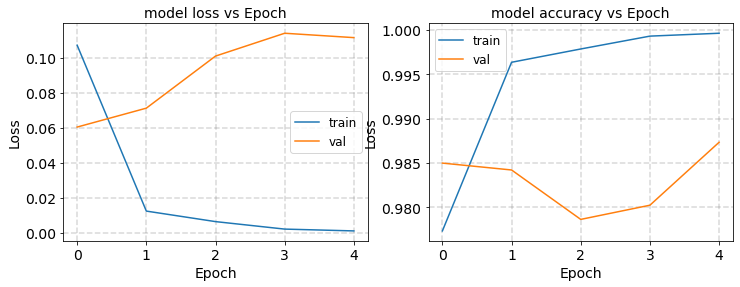

round1 [9 3 8 2]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.0653 - accuracy: 0.9886 - val_loss: 0.0562 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0649 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0905 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 3.9543e-06 - accuracy: 1.0000 - val_loss: 0.1467 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 2.2397e-07 - accuracy: 1.0000 - val_loss: 0.1736 - val_accuracy: 0.9921


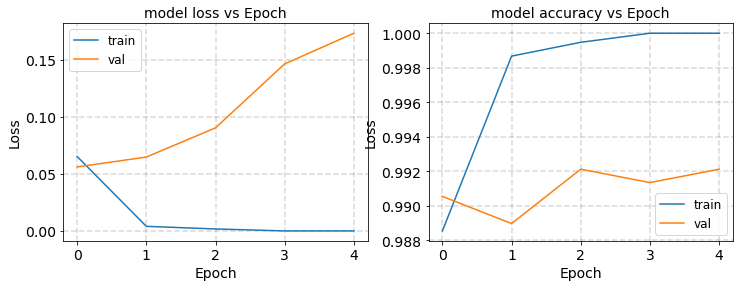

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1076 - accuracy: 0.9855 - val_loss: 0.0851 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0795 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.1046 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1248 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 2.9110e-05 - accuracy: 1.0000 - val_loss: 0.1553 - val_accuracy: 0.9850


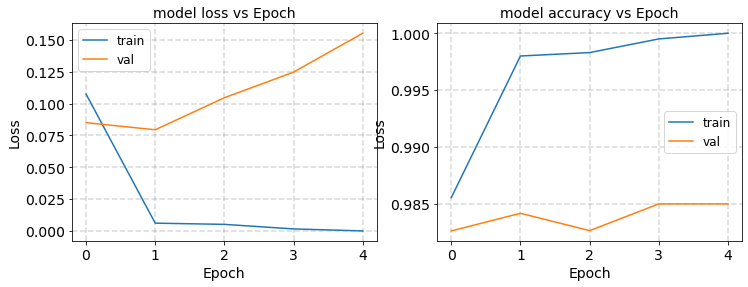

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0804 - accuracy: 0.9835 - val_loss: 0.0462 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0896 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0585 - val_accuracy: 0.9857
Epoch 4/5
1250/1250 - 3s - loss: 1.5581e-04 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 8.4457e-06 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 0.9897


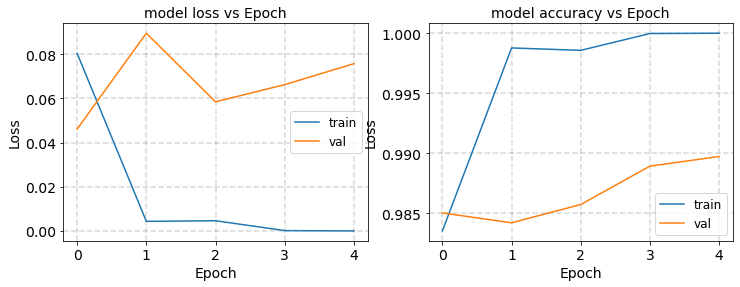

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1223 - accuracy: 0.9853 - val_loss: 0.0550 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0705 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 8.9257e-05 - accuracy: 1.0000 - val_loss: 0.0859 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 3s - loss: 1.1172e-05 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 3.4565e-06 - accuracy: 1.0000 - val_loss: 0.1074 - val_accuracy: 0.9905


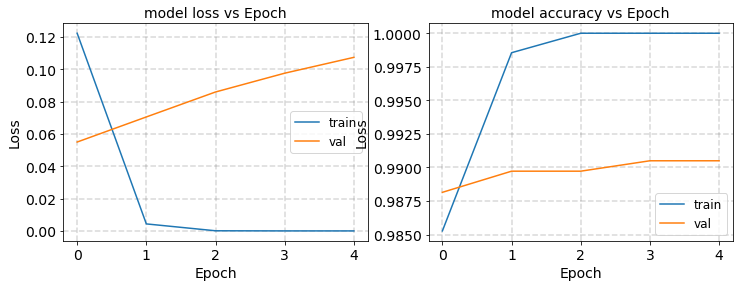

round2 [9 3 8 2]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.0988 - accuracy: 0.9890 - val_loss: 0.0662 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0618 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 4.2960e-04 - accuracy: 0.9999 - val_loss: 0.0850 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 3.8250e-05 - accuracy: 1.0000 - val_loss: 0.0971 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 1.1578e-05 - accuracy: 1.0000 - val_loss: 0.1053 - val_accuracy: 0.9897


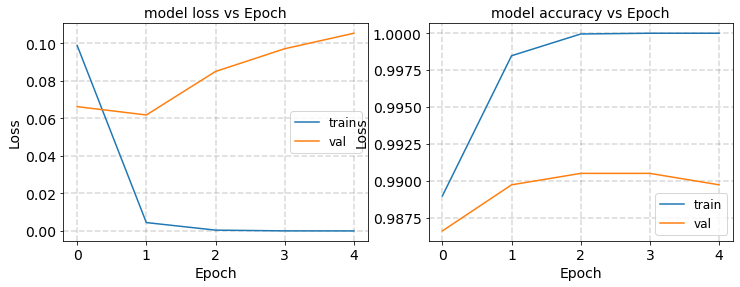

3
Epoch 1/5
1250/1250 - 3s - loss: 0.0860 - accuracy: 0.9853 - val_loss: 0.0824 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0906 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0963 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 1.4494e-04 - accuracy: 1.0000 - val_loss: 0.1133 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 4s - loss: 3.1514e-05 - accuracy: 1.0000 - val_loss: 0.1241 - val_accuracy: 0.9850


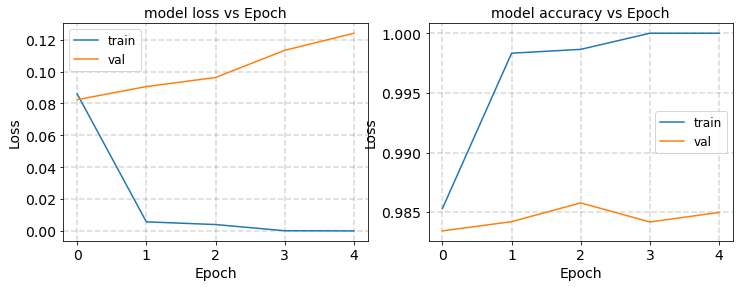

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0752 - accuracy: 0.9860 - val_loss: 0.0394 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 4s - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0542 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0682 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 3s - loss: 1.6135e-04 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 3s - loss: 1.4792e-05 - accuracy: 1.0000 - val_loss: 0.0910 - val_accuracy: 0.9889


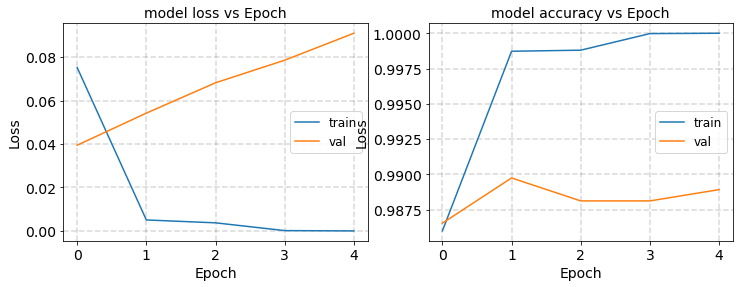

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0920 - accuracy: 0.9901 - val_loss: 0.0576 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0546 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 1.2644e-04 - accuracy: 1.0000 - val_loss: 0.0749 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 1.8042e-05 - accuracy: 1.0000 - val_loss: 0.0853 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 6.0735e-06 - accuracy: 1.0000 - val_loss: 0.0960 - val_accuracy: 0.9921


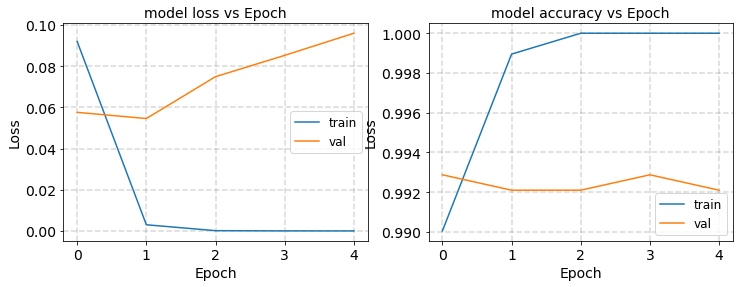

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
________________________________________________

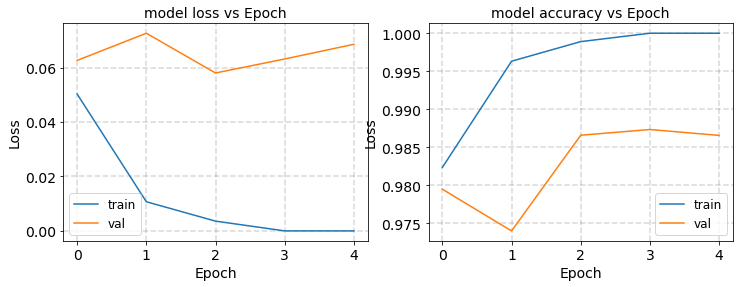

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0639 - accuracy: 0.9853 - val_loss: 0.0454 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0481 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 1.9078e-04 - accuracy: 0.9999 - val_loss: 0.0682 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 3.3160e-05 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 4.8929e-06 - accuracy: 1.0000 - val_loss: 0.0843 - val_accuracy: 0.9929


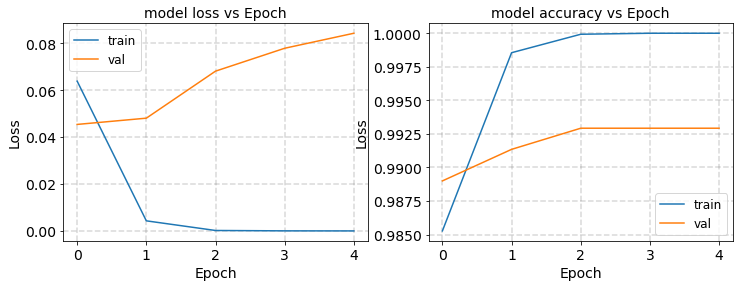

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0729 - accuracy: 0.9878 - val_loss: 0.0774 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0732 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0774 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 4.3583e-05 - accuracy: 1.0000 - val_loss: 0.1121 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 1.5443e-06 - accuracy: 1.0000 - val_loss: 0.1256 - val_accuracy: 0.9858


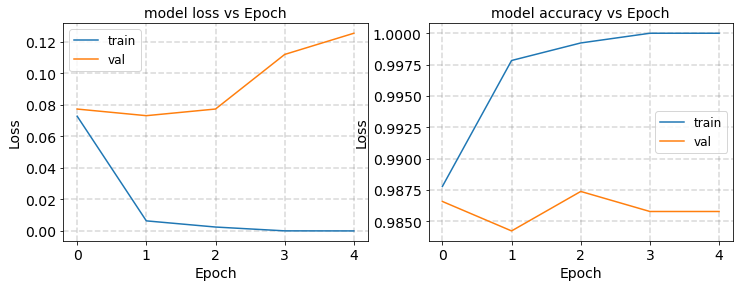

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1163 - accuracy: 0.9773 - val_loss: 0.0833 - val_accuracy: 0.9739
Epoch 2/5
1250/1250 - 3s - loss: 0.0183 - accuracy: 0.9954 - val_loss: 0.0887 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 3s - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.0592 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.1046 - val_accuracy: 0.9841
Epoch 5/5
1250/1250 - 3s - loss: 9.5224e-04 - accuracy: 0.9997 - val_loss: 0.1207 - val_accuracy: 0.9826


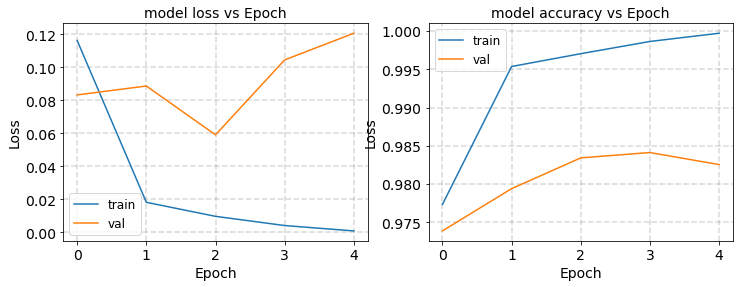

round1 [8 3 9 2]
8
Epoch 1/5
1250/1250 - 3s - loss: 0.1022 - accuracy: 0.9720 - val_loss: 0.0688 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 3s - loss: 0.0160 - accuracy: 0.9950 - val_loss: 0.1098 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 3s - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.1334 - val_accuracy: 0.9762
Epoch 4/5
1250/1250 - 3s - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.1069 - val_accuracy: 0.9786
Epoch 5/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1538 - val_accuracy: 0.9802


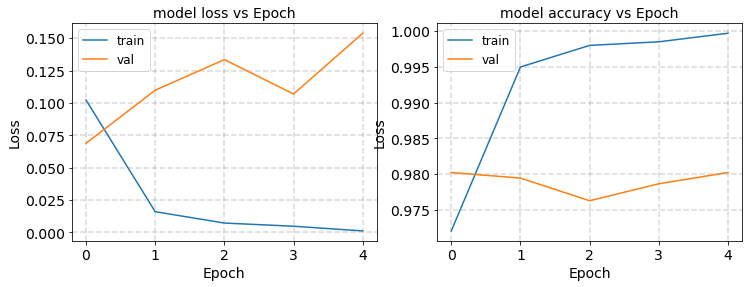

3
Epoch 1/5
1250/1250 - 3s - loss: 0.0952 - accuracy: 0.9760 - val_loss: 0.0949 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 3s - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.1500 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 3s - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.1575 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 4s - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.1188 - val_accuracy: 0.9833
Epoch 5/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.1203 - val_accuracy: 0.9833


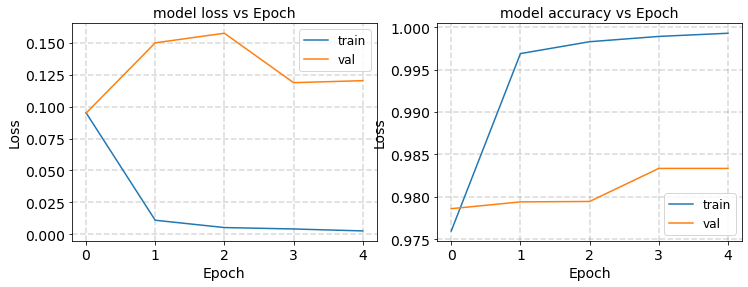

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0579 - accuracy: 0.9877 - val_loss: 0.0934 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 3s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.1438 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1435 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 1.6708e-05 - accuracy: 1.0000 - val_loss: 0.1642 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 4.9182e-06 - accuracy: 1.0000 - val_loss: 0.1808 - val_accuracy: 0.9874


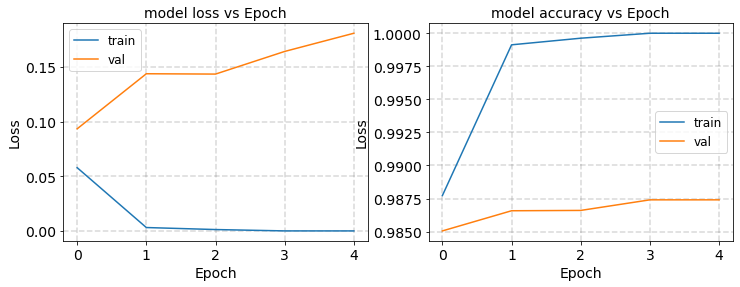

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0966 - accuracy: 0.9826 - val_loss: 0.0437 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0414 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0499 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0698 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 6.1425e-04 - accuracy: 0.9998 - val_loss: 0.0831 - val_accuracy: 0.9920


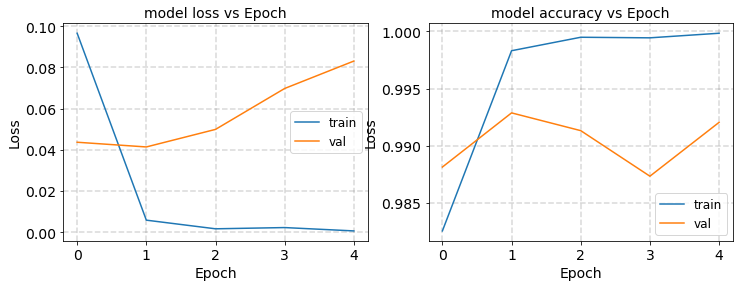

round2 [8 3 2 9]
8
Epoch 1/5
1250/1250 - 3s - loss: 0.0973 - accuracy: 0.9761 - val_loss: 0.0702 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 3s - loss: 0.0106 - accuracy: 0.9970 - val_loss: 0.0901 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 3s - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0955 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.1019 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 3s - loss: 4.4269e-05 - accuracy: 1.0000 - val_loss: 0.1275 - val_accuracy: 0.9842


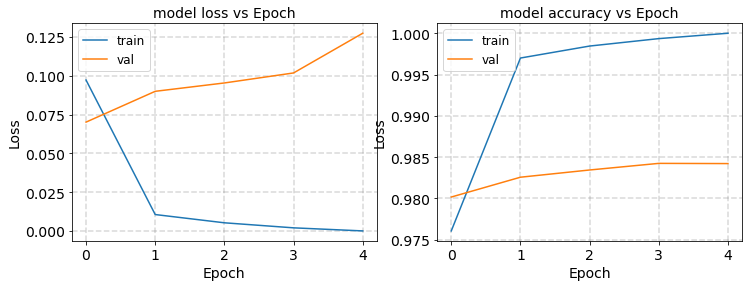

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1323 - accuracy: 0.9695 - val_loss: 0.1891 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 4s - loss: 0.0097 - accuracy: 0.9964 - val_loss: 0.1386 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 4s - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.1532 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 4s - loss: 8.0283e-04 - accuracy: 0.9998 - val_loss: 0.2299 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 4s - loss: 1.9278e-05 - accuracy: 1.0000 - val_loss: 0.2645 - val_accuracy: 0.9865


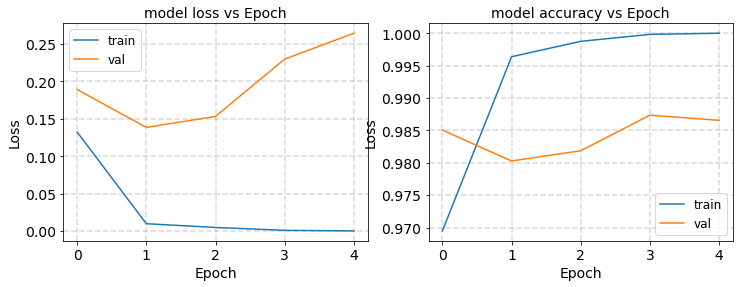

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1358 - accuracy: 0.9740 - val_loss: 0.0567 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0122 - accuracy: 0.9956 - val_loss: 0.0921 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.1012 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.1233 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 2.5629e-05 - accuracy: 1.0000 - val_loss: 0.1388 - val_accuracy: 0.9889


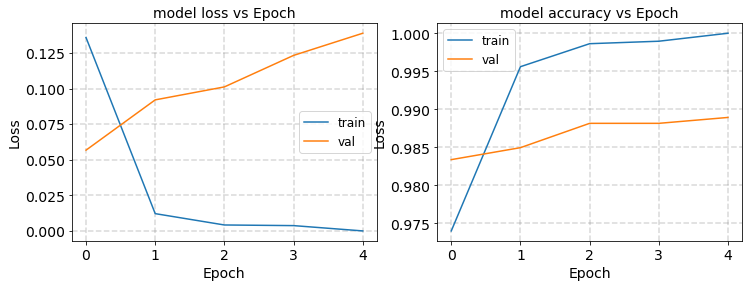

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0836 - accuracy: 0.9872 - val_loss: 0.1274 - val_accuracy: 0.9732
Epoch 2/5
1250/1250 - 4s - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.1283 - val_accuracy: 0.9796
Epoch 3/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9989 - val_loss: 0.1299 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 4s - loss: 9.9410e-04 - accuracy: 0.9996 - val_loss: 0.1365 - val_accuracy: 0.9756
Epoch 5/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.1082 - val_accuracy: 0.9826


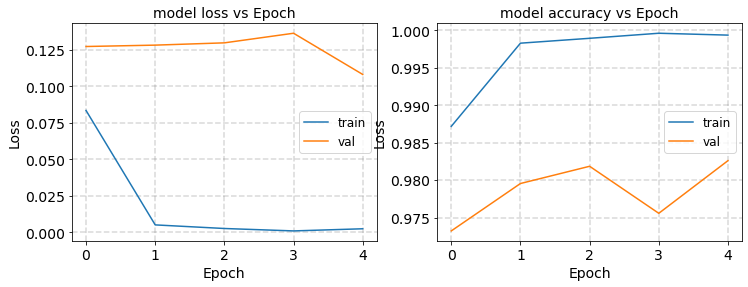

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
________________________________________________

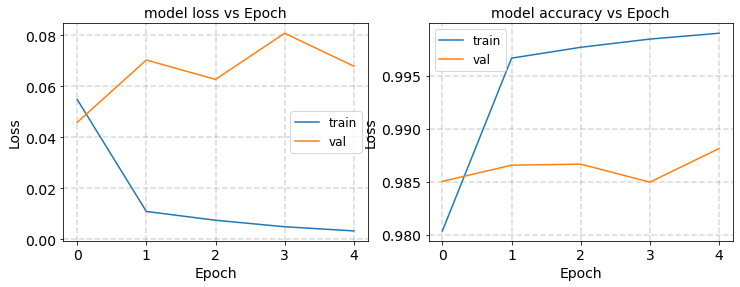

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0609 - accuracy: 0.9871 - val_loss: 0.0310 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 2s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0527 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0481 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 7.3639e-06 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 3.6092e-07 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9921


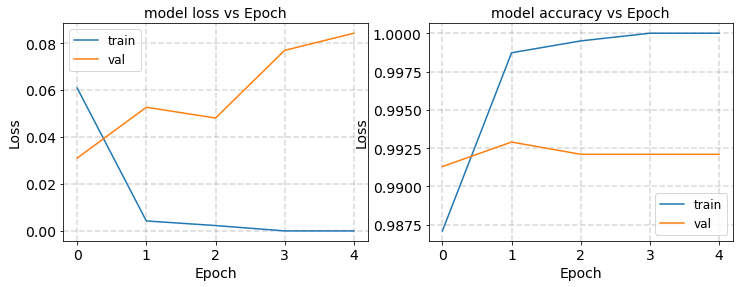

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0687 - accuracy: 0.9879 - val_loss: 0.0344 - val_accuracy: 0.9912
Epoch 2/5
1250/1250 - 2s - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0455 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 2s - loss: 1.1816e-04 - accuracy: 1.0000 - val_loss: 0.0598 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 2s - loss: 1.4994e-06 - accuracy: 1.0000 - val_loss: 0.0673 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 2s - loss: 4.7221e-07 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9929


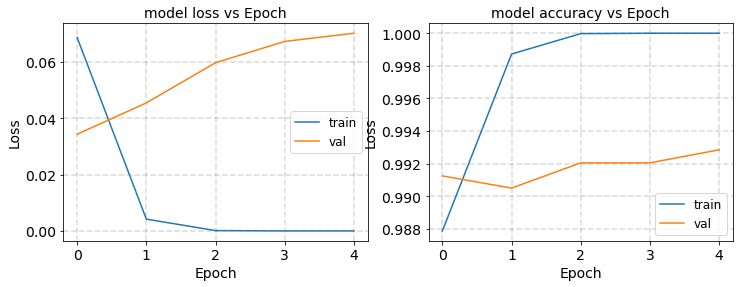

3
Epoch 1/5
1250/1250 - 2s - loss: 0.0958 - accuracy: 0.9844 - val_loss: 0.0638 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 2s - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0784 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 2s - loss: 0.0032 - accuracy: 0.9988 - val_loss: 0.1020 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 2s - loss: 4.7101e-05 - accuracy: 1.0000 - val_loss: 0.1223 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 2s - loss: 7.8918e-06 - accuracy: 1.0000 - val_loss: 0.1379 - val_accuracy: 0.9873


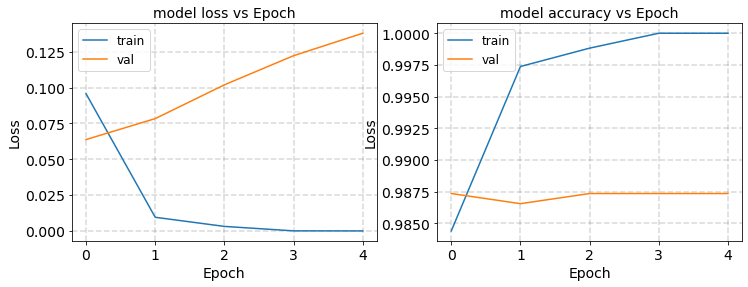

round1 [2 9 8 3]
2
Epoch 1/5
1250/1250 - 2s - loss: 0.0960 - accuracy: 0.9811 - val_loss: 0.0513 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 2s - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0759 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 2s - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0647 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 1.4054e-04 - accuracy: 1.0000 - val_loss: 0.1002 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 7.7489e-06 - accuracy: 1.0000 - val_loss: 0.1187 - val_accuracy: 0.9913


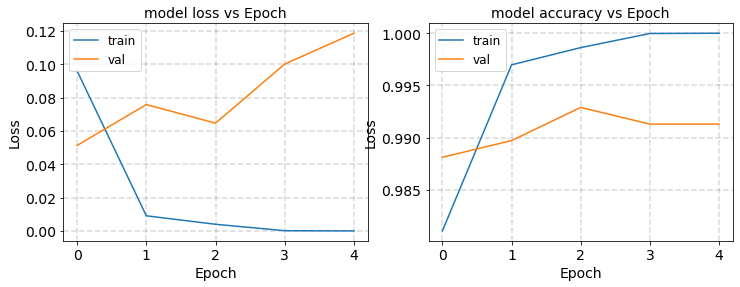

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0756 - accuracy: 0.9864 - val_loss: 0.0451 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 3s - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0461 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0823 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0810 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 3.0671e-05 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 0.9914


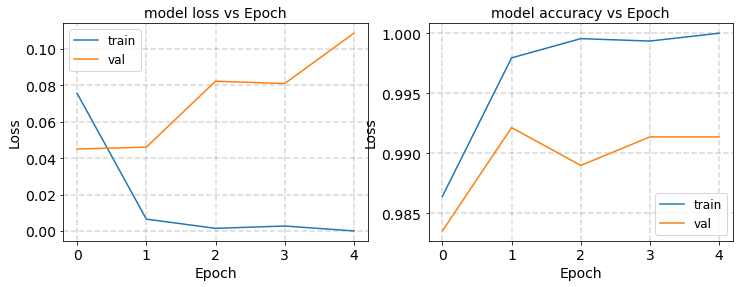

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0917 - accuracy: 0.9772 - val_loss: 0.0614 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 3s - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.0637 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0833 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 3.6910e-05 - accuracy: 1.0000 - val_loss: 0.0990 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 1.1102e-05 - accuracy: 1.0000 - val_loss: 0.1124 - val_accuracy: 0.9850


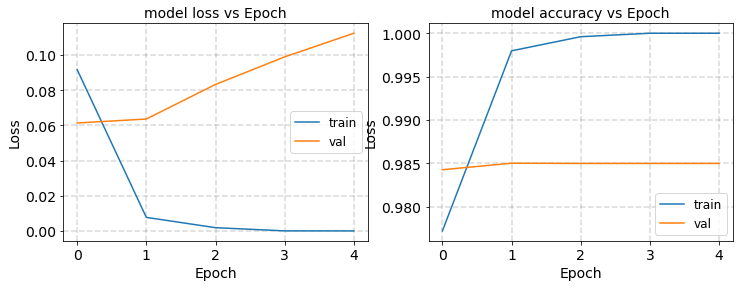

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1147 - accuracy: 0.9739 - val_loss: 0.0666 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 3s - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0877 - val_accuracy: 0.9812
Epoch 3/5
1250/1250 - 3s - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.1000 - val_accuracy: 0.9827
Epoch 4/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.1537 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.1254 - val_accuracy: 0.9873


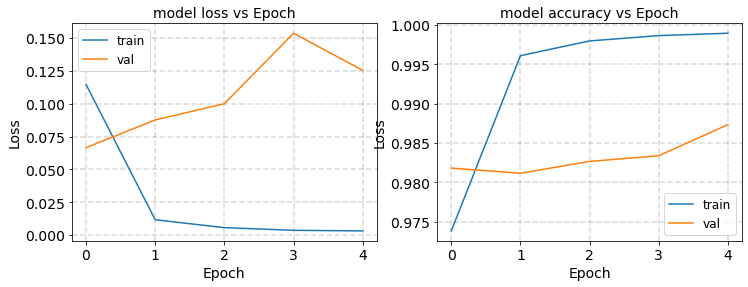

round2 [9 8 2 3]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.0844 - accuracy: 0.9825 - val_loss: 0.0448 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0620 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 2.8801e-04 - accuracy: 0.9999 - val_loss: 0.0739 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 7.2277e-06 - accuracy: 1.0000 - val_loss: 0.0822 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 2.5884e-06 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9913


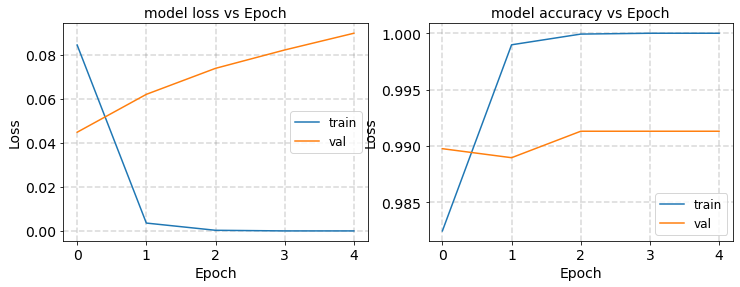

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1234 - accuracy: 0.9756 - val_loss: 0.0605 - val_accuracy: 0.9833
Epoch 2/5
1250/1250 - 3s - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0760 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0979 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1790 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.1158 - val_accuracy: 0.9850


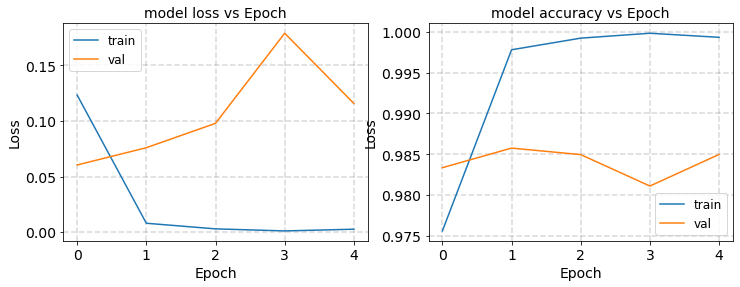

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0845 - accuracy: 0.9866 - val_loss: 0.0376 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0505 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0555 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 2s - loss: 2.4767e-04 - accuracy: 0.9999 - val_loss: 0.0671 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 1.0907e-05 - accuracy: 1.0000 - val_loss: 0.0743 - val_accuracy: 0.9921


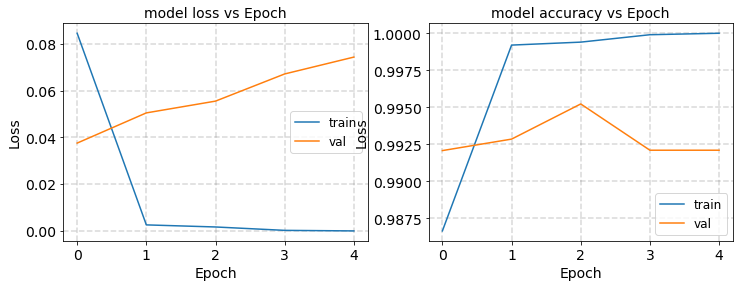

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1060 - accuracy: 0.9819 - val_loss: 0.0807 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 3s - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.0923 - val_accuracy: 0.9835
Epoch 3/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0851 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 3s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.1170 - val_accuracy: 0.9827
Epoch 5/5
1250/1250 - 3s - loss: 2.1883e-04 - accuracy: 0.9999 - val_loss: 0.1375 - val_accuracy: 0.9827


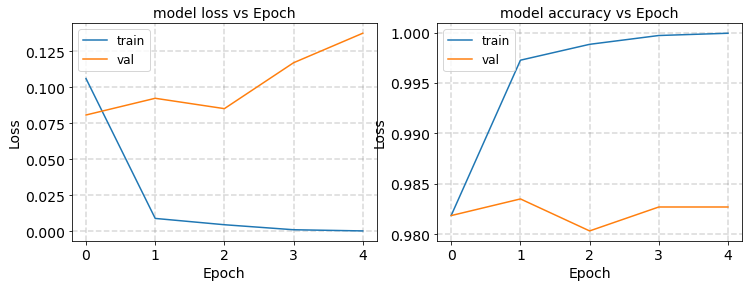

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
________________________________________________

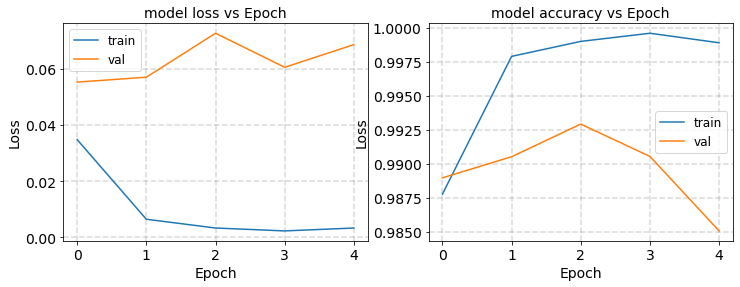

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0780 - accuracy: 0.9820 - val_loss: 0.0531 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 4s - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0583 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0407 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 6.9410e-04 - accuracy: 0.9998 - val_loss: 0.0697 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 3.7468e-06 - accuracy: 1.0000 - val_loss: 0.0854 - val_accuracy: 0.9905


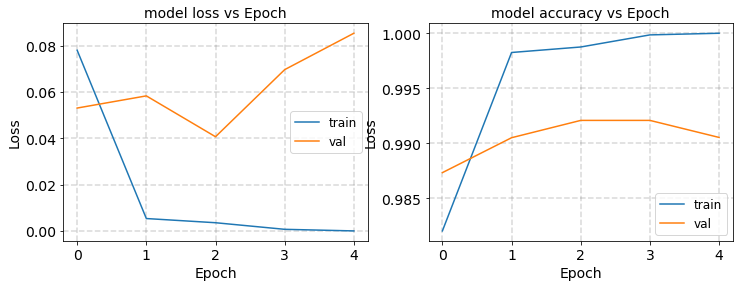

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0968 - accuracy: 0.9800 - val_loss: 0.0715 - val_accuracy: 0.9794
Epoch 2/5
1250/1250 - 4s - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0659 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0616 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 3s - loss: 9.4419e-05 - accuracy: 1.0000 - val_loss: 0.0941 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 4.1503e-06 - accuracy: 1.0000 - val_loss: 0.1394 - val_accuracy: 0.9881


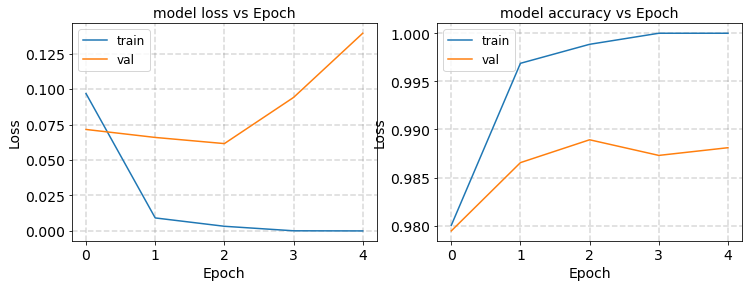

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0850 - accuracy: 0.9852 - val_loss: 0.0554 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 3s - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0511 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0660 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0500 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 3.1096e-05 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9874


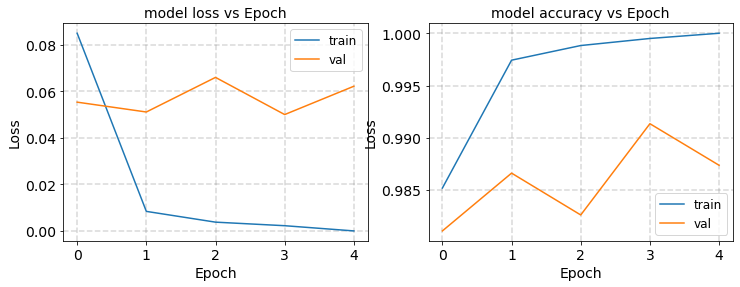

round1 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 4s - loss: 0.0525 - accuracy: 0.9888 - val_loss: 0.0479 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0966 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 7.2222e-06 - accuracy: 1.0000 - val_loss: 0.1128 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 1.0021e-06 - accuracy: 1.0000 - val_loss: 0.1484 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 1.1895e-07 - accuracy: 1.0000 - val_loss: 0.1690 - val_accuracy: 0.9874


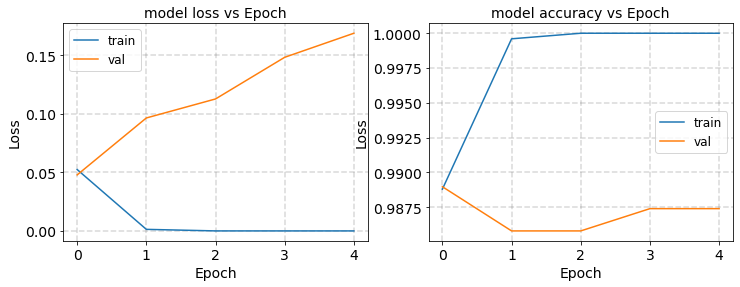

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0953 - accuracy: 0.9845 - val_loss: 0.0577 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0544 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0788 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 2.2438e-05 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 4.1521e-06 - accuracy: 1.0000 - val_loss: 0.1092 - val_accuracy: 0.9873


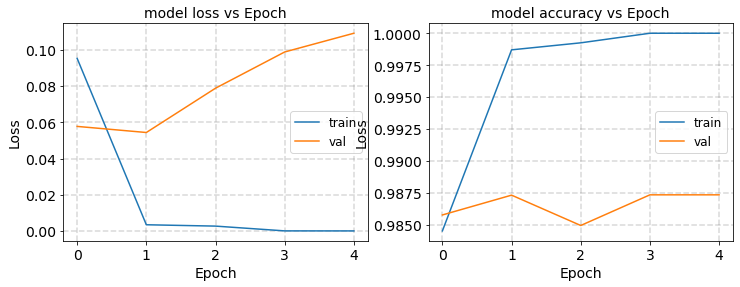

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1157 - accuracy: 0.9743 - val_loss: 0.0841 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 3s - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.1179 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 3s - loss: 6.7746e-04 - accuracy: 0.9999 - val_loss: 0.1137 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 3s - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0824 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.1071 - val_accuracy: 0.9865


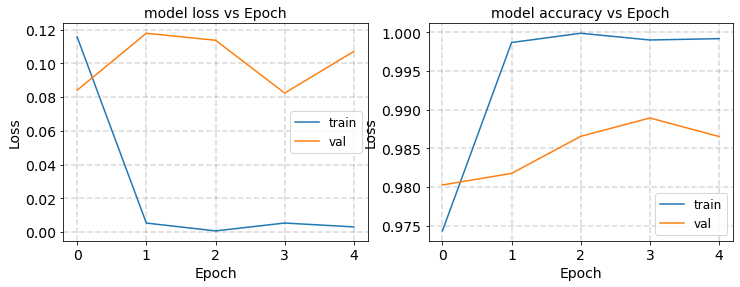

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0829 - accuracy: 0.9823 - val_loss: 0.0457 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0747 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0522 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 3.8901e-04 - accuracy: 0.9999 - val_loss: 0.0627 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 3s - loss: 1.3213e-05 - accuracy: 1.0000 - val_loss: 0.0690 - val_accuracy: 0.9952


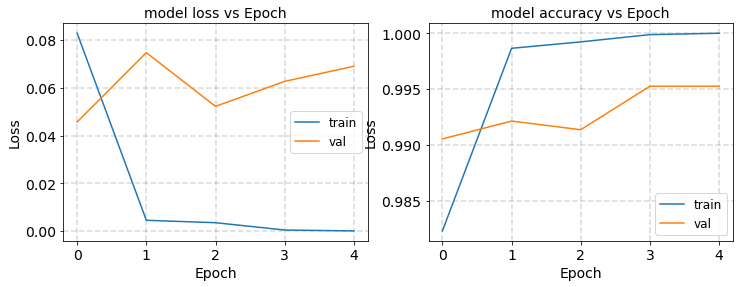

round2 [3 2 8 9]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.1138 - accuracy: 0.9774 - val_loss: 0.0743 - val_accuracy: 0.9817
Epoch 2/5
1250/1250 - 3s - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.0792 - val_accuracy: 0.9833
Epoch 3/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1112 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0836 - val_accuracy: 0.9857
Epoch 5/5
1250/1250 - 3s - loss: 5.4744e-05 - accuracy: 1.0000 - val_loss: 0.1172 - val_accuracy: 0.9850


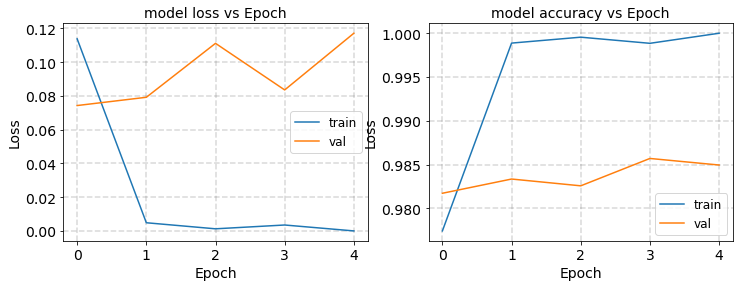

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0800 - accuracy: 0.9844 - val_loss: 0.0526 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 3s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0681 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 9.0187e-05 - accuracy: 1.0000 - val_loss: 0.0859 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 1.1547e-05 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 3.7203e-06 - accuracy: 1.0000 - val_loss: 0.1092 - val_accuracy: 0.9905


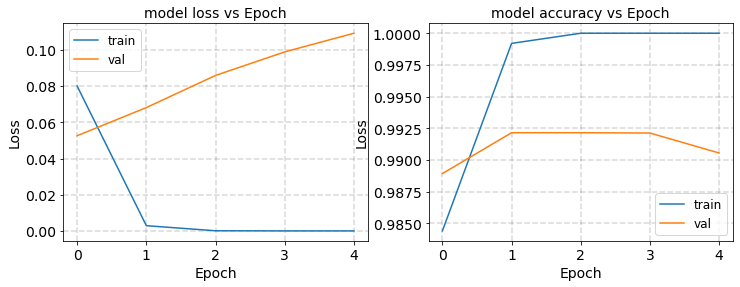

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0987 - accuracy: 0.9776 - val_loss: 0.0990 - val_accuracy: 0.9778
Epoch 2/5
1250/1250 - 2s - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0875 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 2s - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.1079 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 2s - loss: 1.3283e-04 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 3s - loss: 1.6213e-05 - accuracy: 1.0000 - val_loss: 0.1279 - val_accuracy: 0.9826


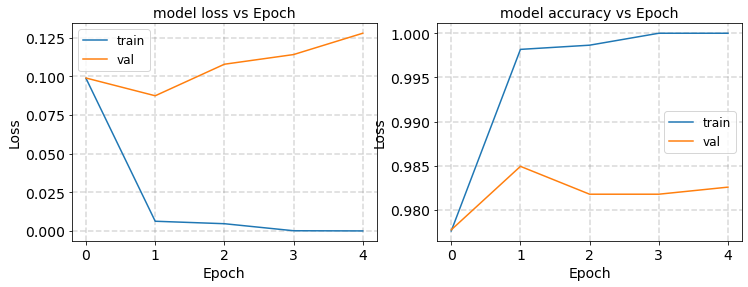

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0721 - accuracy: 0.9897 - val_loss: 0.0689 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0872 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.1003 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0655 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 2s - loss: 5.6649e-05 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9905


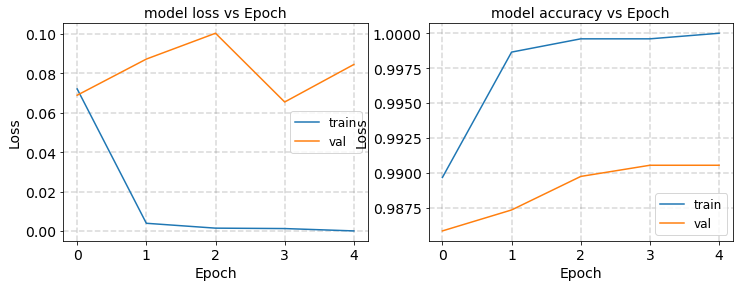

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
_______________________________________________

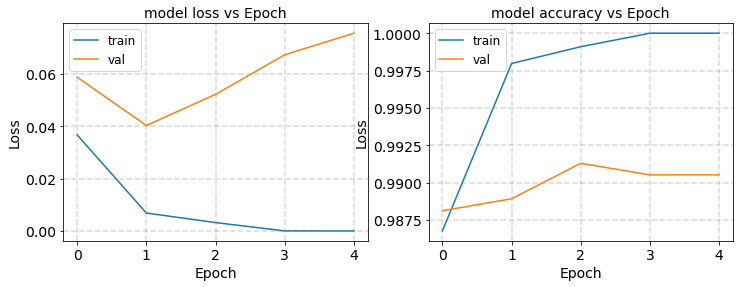

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0827 - accuracy: 0.9846 - val_loss: 0.0548 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0369 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0627 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0640 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 9.3278e-04 - accuracy: 0.9998 - val_loss: 0.0963 - val_accuracy: 0.9890


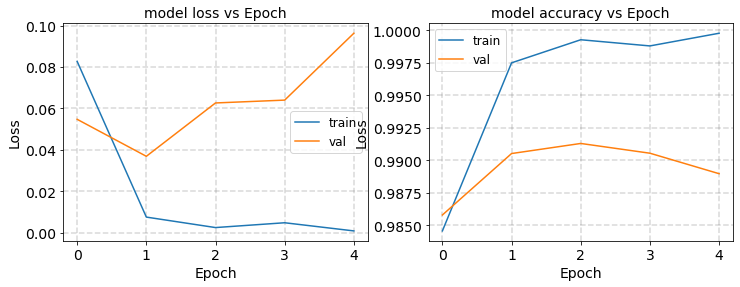

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0999 - accuracy: 0.9740 - val_loss: 0.0500 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 3s - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0650 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.0790 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0671 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0881 - val_accuracy: 0.9881


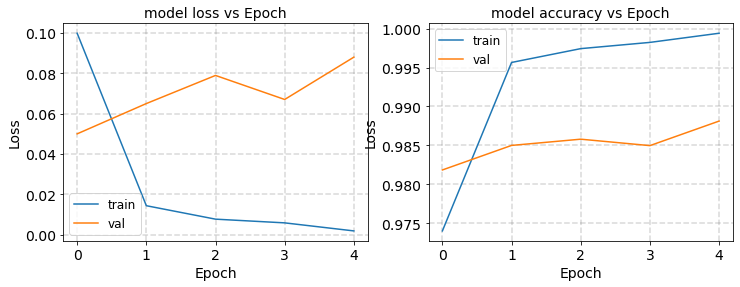

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1167 - accuracy: 0.9735 - val_loss: 0.0551 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0705 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0771 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0812 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1120 - val_accuracy: 0.9882


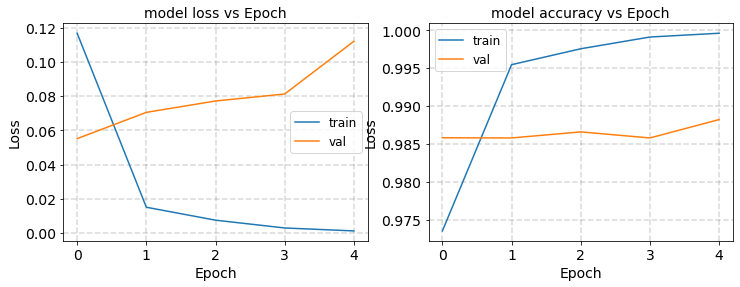

round1 [8 3 2 9]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.0823 - accuracy: 0.9811 - val_loss: 0.0795 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 3s - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.1178 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 3s - loss: 3.3863e-04 - accuracy: 0.9999 - val_loss: 0.1485 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 1.6207e-05 - accuracy: 1.0000 - val_loss: 0.1684 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 4s - loss: 5.4229e-06 - accuracy: 1.0000 - val_loss: 0.1860 - val_accuracy: 0.9850


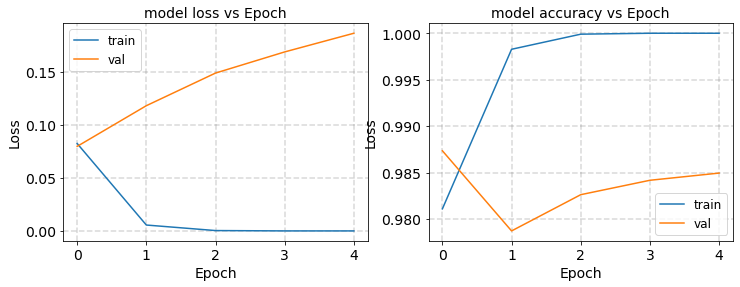

3
Epoch 1/5
1250/1250 - 3s - loss: 0.0793 - accuracy: 0.9846 - val_loss: 0.0843 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 3s - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.1015 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 3s - loss: 8.1606e-04 - accuracy: 0.9998 - val_loss: 0.1530 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 4s - loss: 9.3260e-06 - accuracy: 1.0000 - val_loss: 0.2017 - val_accuracy: 0.9810
Epoch 5/5
1250/1250 - 4s - loss: 2.1488e-06 - accuracy: 1.0000 - val_loss: 0.2171 - val_accuracy: 0.9810


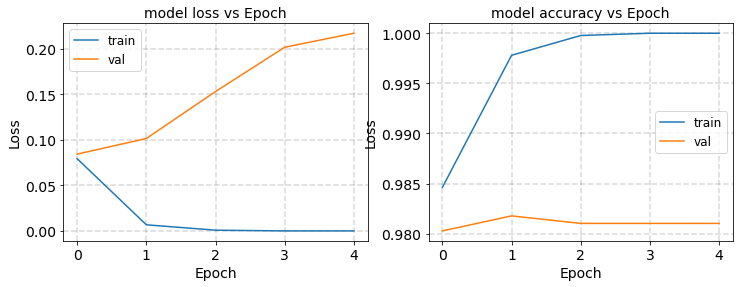

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0853 - accuracy: 0.9865 - val_loss: 0.0669 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 4s - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0945 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 2.5479e-04 - accuracy: 0.9999 - val_loss: 0.1282 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 1.9451e-05 - accuracy: 1.0000 - val_loss: 0.1489 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 6.9160e-06 - accuracy: 1.0000 - val_loss: 0.1686 - val_accuracy: 0.9874


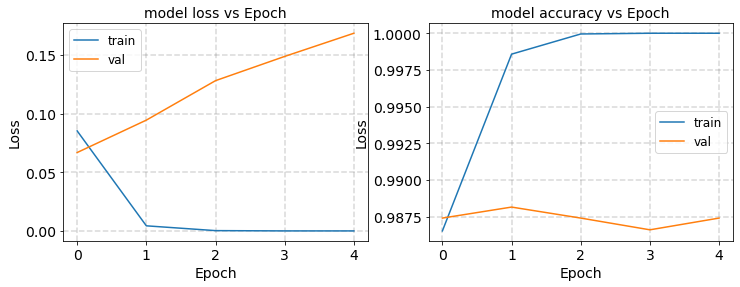

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0848 - accuracy: 0.9855 - val_loss: 0.0528 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0536 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0557 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 8.3664e-04 - accuracy: 0.9998 - val_loss: 0.0734 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 1.2767e-05 - accuracy: 1.0000 - val_loss: 0.0885 - val_accuracy: 0.9921


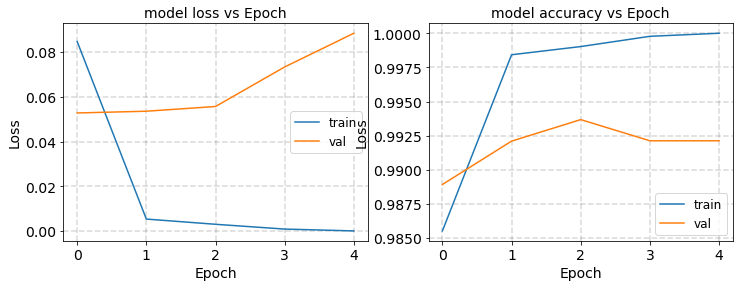

round2 [9 3 8 2]
9
Epoch 1/5
1250/1250 - 3s - loss: 3.4805e-06 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 1.3598e-06 - accuracy: 1.0000 - val_loss: 0.1051 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 5.9336e-07 - accuracy: 1.0000 - val_loss: 0.1130 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 2.7180e-07 - accuracy: 1.0000 - val_loss: 0.1183 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 1.2647e-07 - accuracy: 1.0000 - val_loss: 0.1252 - val_accuracy: 0.9921


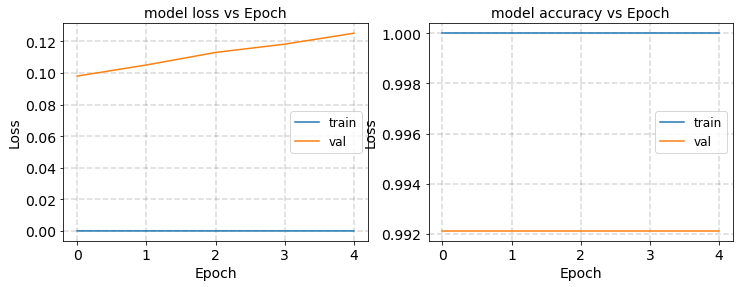

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1446 - accuracy: 0.9722 - val_loss: 0.0734 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.1069 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 3s - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.1156 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.1444 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 4s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.1441 - val_accuracy: 0.9803


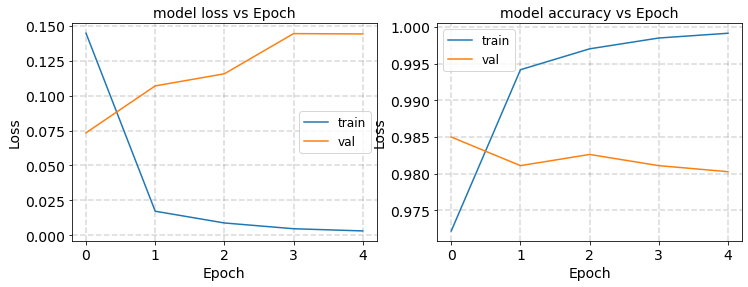

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0763 - accuracy: 0.9841 - val_loss: 0.0883 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 4s - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.1627 - val_accuracy: 0.9683
Epoch 3/5
1250/1250 - 4s - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.1208 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.1314 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.1805 - val_accuracy: 0.9834


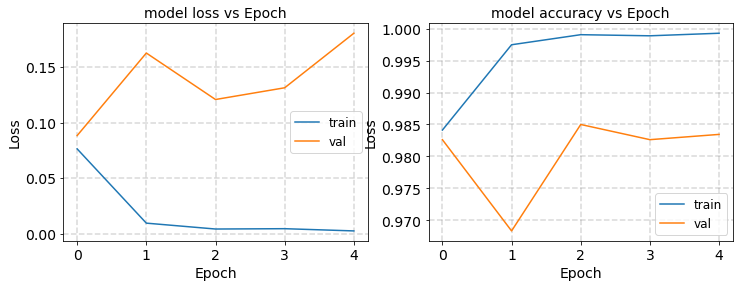

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1012 - accuracy: 0.9837 - val_loss: 0.0597 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0919 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0973 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 4.8665e-05 - accuracy: 1.0000 - val_loss: 0.1163 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 1.5123e-05 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 0.9866


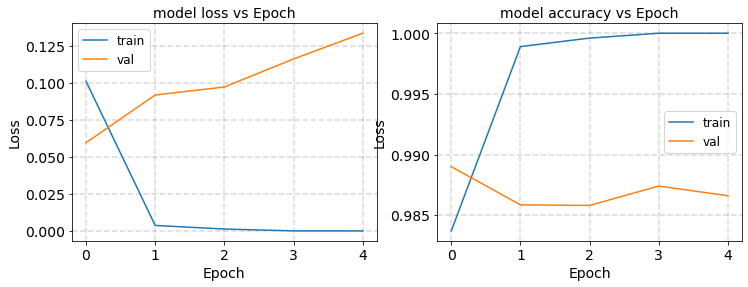

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
_______________________________________________

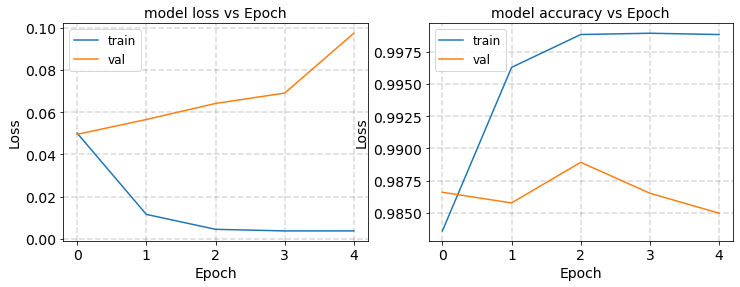

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0590 - accuracy: 0.9876 - val_loss: 0.0408 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 2s - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0365 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 2s - loss: 4.9025e-05 - accuracy: 1.0000 - val_loss: 0.0408 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 2s - loss: 4.4533e-06 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 2s - loss: 1.2311e-06 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9937


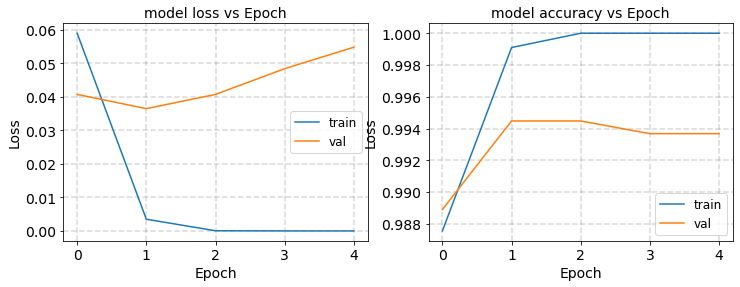

8
Epoch 1/5
1250/1250 - 2s - loss: 0.0750 - accuracy: 0.9841 - val_loss: 0.0644 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 2s - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0813 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0874 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 2s - loss: 1.5879e-05 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 2s - loss: 4.4725e-06 - accuracy: 1.0000 - val_loss: 0.1079 - val_accuracy: 0.9842


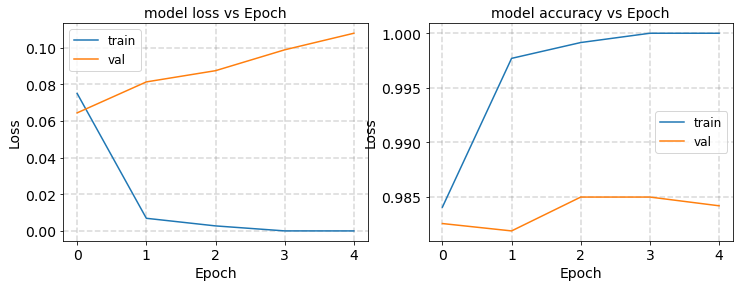

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0539 - accuracy: 0.9890 - val_loss: 0.0415 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 2s - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0469 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0539 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 2s - loss: 3.1949e-05 - accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 2s - loss: 6.1041e-07 - accuracy: 1.0000 - val_loss: 0.1138 - val_accuracy: 0.9897


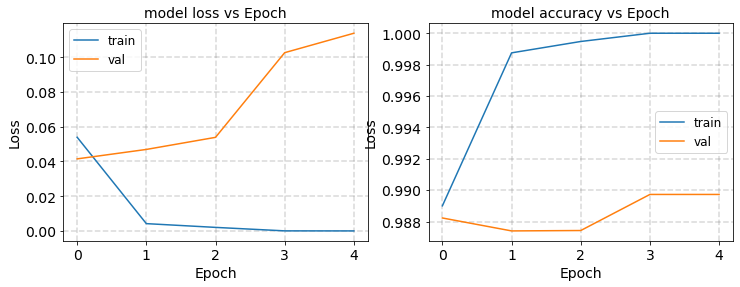

round1 [9 3 2 8]
9
Epoch 1/5
1250/1250 - 2s - loss: 2.5949e-07 - accuracy: 1.0000 - val_loss: 0.1230 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 2s - loss: 1.0580e-07 - accuracy: 1.0000 - val_loss: 0.1336 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 2s - loss: 3.1940e-08 - accuracy: 1.0000 - val_loss: 0.1425 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 2s - loss: 1.2506e-08 - accuracy: 1.0000 - val_loss: 0.1496 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 6.0131e-09 - accuracy: 1.0000 - val_loss: 0.1559 - val_accuracy: 0.9897


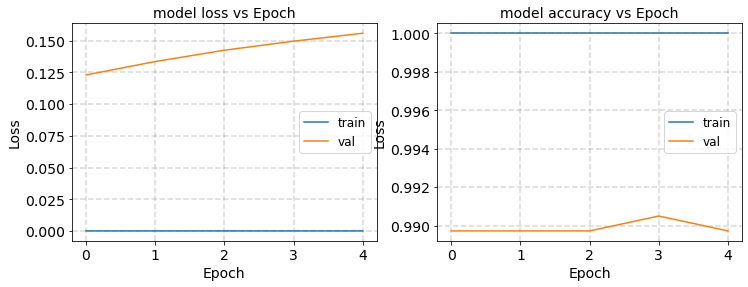

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1453 - accuracy: 0.9797 - val_loss: 0.0619 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 3s - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0947 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0951 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 2.5413e-04 - accuracy: 0.9999 - val_loss: 0.1338 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0899 - val_accuracy: 0.9890


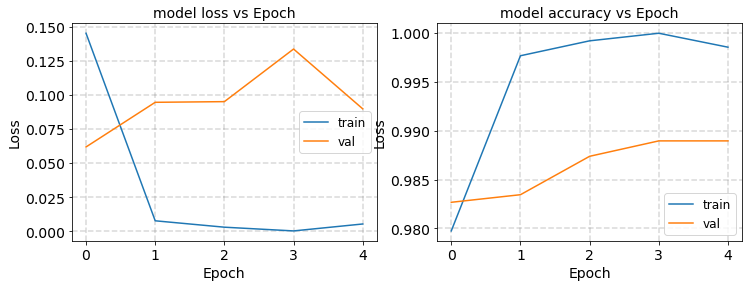

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0845 - accuracy: 0.9845 - val_loss: 0.0551 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0723 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0806 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0785 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 2.2102e-05 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9937


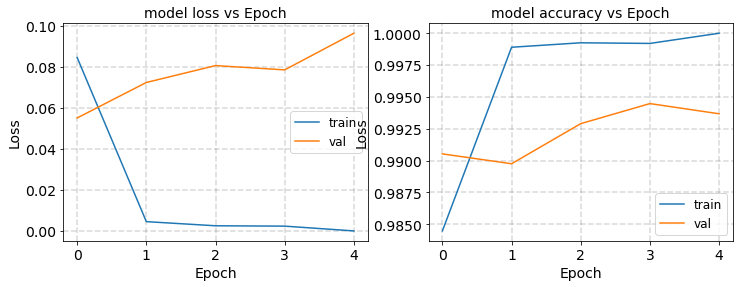

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0950 - accuracy: 0.9787 - val_loss: 0.0618 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 3s - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0893 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0992 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 2s - loss: 4.6346e-05 - accuracy: 1.0000 - val_loss: 0.1145 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 2s - loss: 9.7018e-06 - accuracy: 1.0000 - val_loss: 0.1280 - val_accuracy: 0.9850


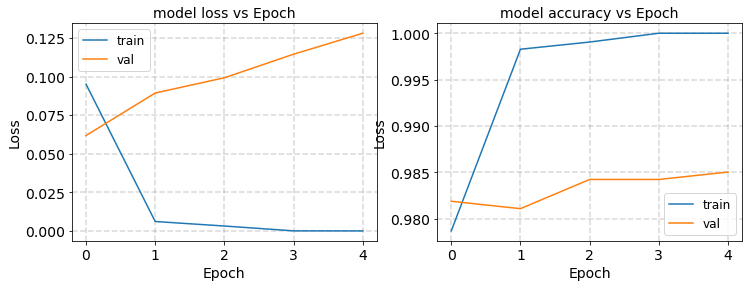

round2 [3 2 8 9]
3
Epoch 1/5
1250/1250 - 2s - loss: 0.0896 - accuracy: 0.9808 - val_loss: 0.0406 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0594 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 7.9703e-04 - accuracy: 0.9998 - val_loss: 0.0934 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 1.4496e-05 - accuracy: 1.0000 - val_loss: 0.1247 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 1.4100e-06 - accuracy: 1.0000 - val_loss: 0.1753 - val_accuracy: 0.9874


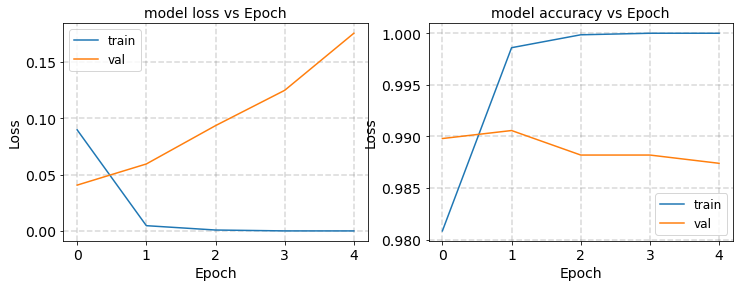

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0899 - accuracy: 0.9875 - val_loss: 0.0727 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0852 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 1.3365e-04 - accuracy: 1.0000 - val_loss: 0.1218 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 9.2580e-06 - accuracy: 1.0000 - val_loss: 0.1379 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 3.0939e-06 - accuracy: 1.0000 - val_loss: 0.1508 - val_accuracy: 0.9921


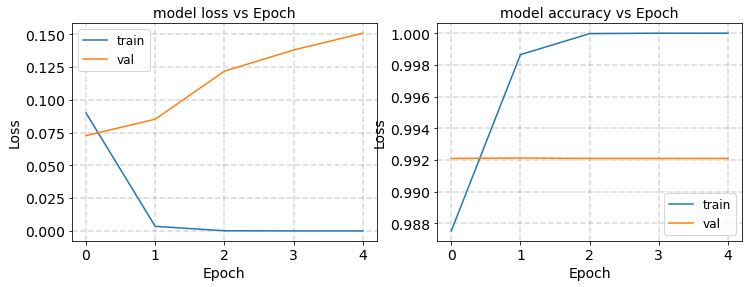

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0924 - accuracy: 0.9818 - val_loss: 0.0701 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 3s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0954 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 4.4676e-05 - accuracy: 1.0000 - val_loss: 0.1145 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 3s - loss: 1.3069e-05 - accuracy: 1.0000 - val_loss: 0.1286 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 3s - loss: 5.1829e-06 - accuracy: 1.0000 - val_loss: 0.1413 - val_accuracy: 0.9819


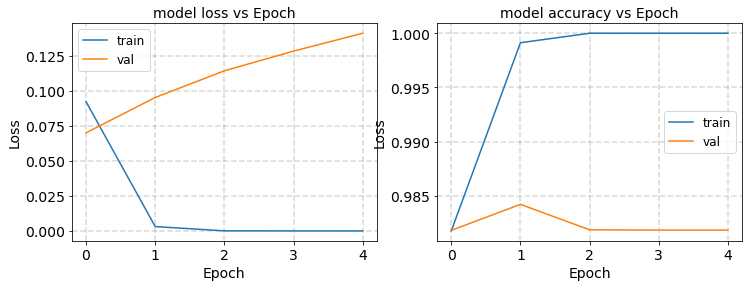

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0793 - accuracy: 0.9882 - val_loss: 0.0288 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0808 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0635 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 3.0638e-05 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 1.1905e-05 - accuracy: 1.0000 - val_loss: 0.0796 - val_accuracy: 0.9890


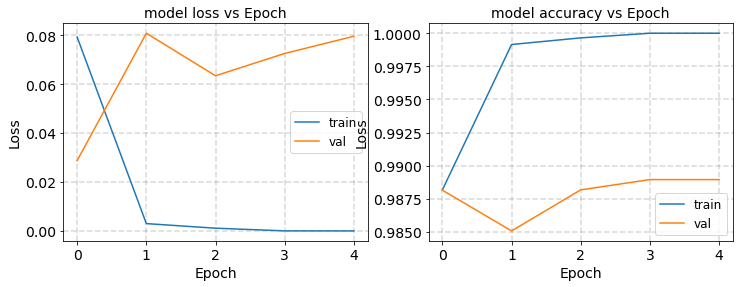

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
_______________________________________________

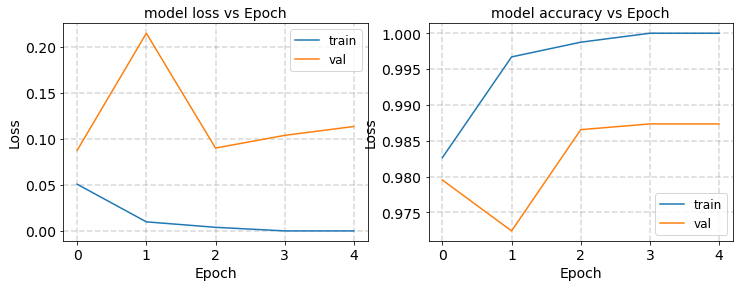

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0693 - accuracy: 0.9821 - val_loss: 0.0615 - val_accuracy: 0.9794
Epoch 2/5
1250/1250 - 3s - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0602 - val_accuracy: 0.9825
Epoch 3/5
1250/1250 - 3s - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0824 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0635 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 1.9036e-05 - accuracy: 1.0000 - val_loss: 0.0912 - val_accuracy: 0.9897


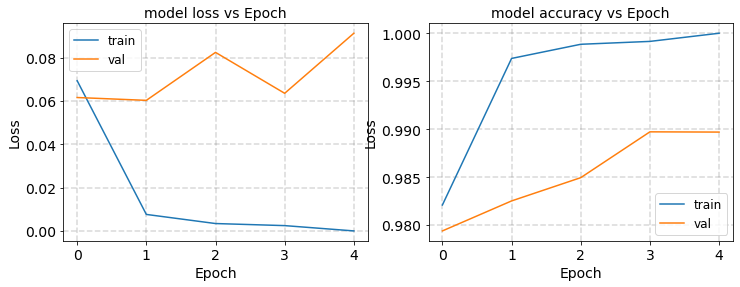

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0748 - accuracy: 0.9855 - val_loss: 0.0563 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0737 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 3s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0681 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0804 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 8.1718e-06 - accuracy: 1.0000 - val_loss: 0.1178 - val_accuracy: 0.9890


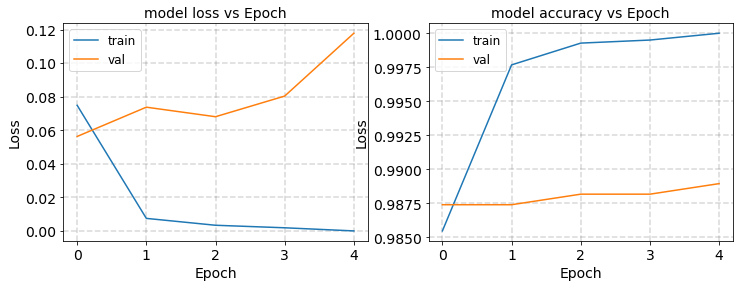

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0945 - accuracy: 0.9877 - val_loss: 0.0280 - val_accuracy: 0.9953
Epoch 2/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0578 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0611 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 3s - loss: 9.8190e-06 - accuracy: 1.0000 - val_loss: 0.0731 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 1.6511e-06 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9937


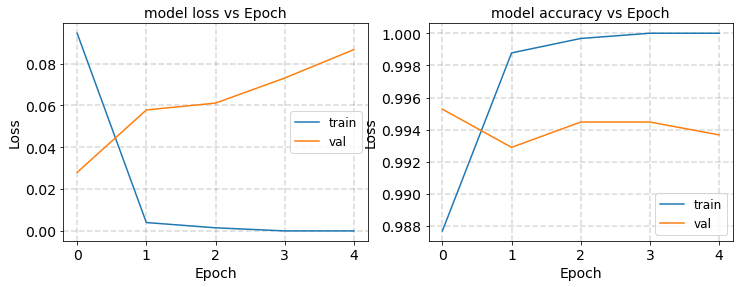

round1 [2 3 9 8]
2
Epoch 1/5
1250/1250 - 3s - loss: 2.3419e-07 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 7.1394e-08 - accuracy: 1.0000 - val_loss: 0.1053 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 3.1685e-08 - accuracy: 1.0000 - val_loss: 0.1098 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 1.5907e-08 - accuracy: 1.0000 - val_loss: 0.1132 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 8.4472e-09 - accuracy: 1.0000 - val_loss: 0.1201 - val_accuracy: 0.9921


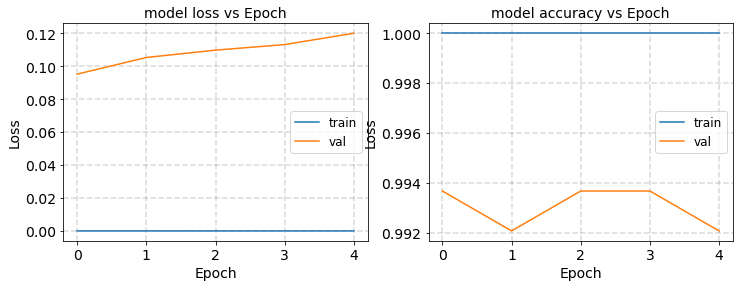

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1548 - accuracy: 0.9750 - val_loss: 0.0674 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 3s - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0821 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.1211 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0990 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.1210 - val_accuracy: 0.9850


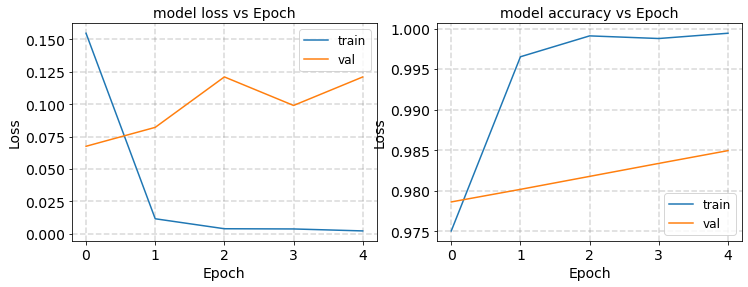

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0749 - accuracy: 0.9859 - val_loss: 0.0411 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 3s - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0580 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0632 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 3s - loss: 7.5835e-05 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 1.4735e-05 - accuracy: 1.0000 - val_loss: 0.0848 - val_accuracy: 0.9890


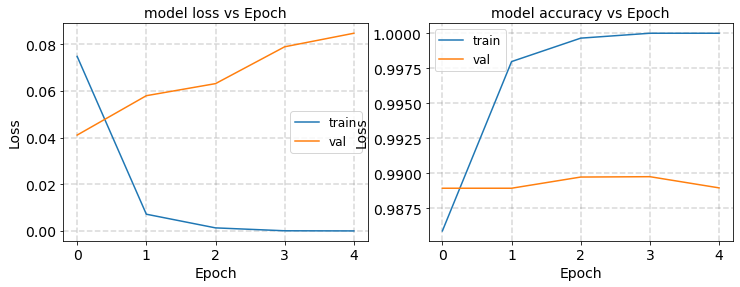

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1079 - accuracy: 0.9754 - val_loss: 0.0567 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 3s - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0706 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0744 - val_accuracy: 0.9857
Epoch 4/5
1250/1250 - 3s - loss: 8.8972e-05 - accuracy: 1.0000 - val_loss: 0.0975 - val_accuracy: 0.9857
Epoch 5/5
1250/1250 - 3s - loss: 8.6877e-06 - accuracy: 1.0000 - val_loss: 0.1240 - val_accuracy: 0.9857


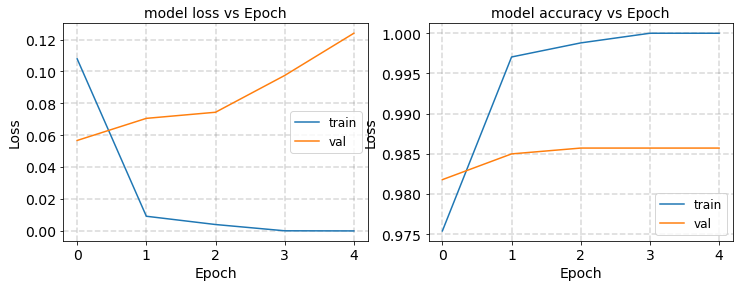

round2 [2 9 8 3]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.1296 - accuracy: 0.9822 - val_loss: 0.0431 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0463 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0423 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 3s - loss: 5.5998e-05 - accuracy: 1.0000 - val_loss: 0.0546 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 3s - loss: 1.4332e-05 - accuracy: 1.0000 - val_loss: 0.0648 - val_accuracy: 0.9944


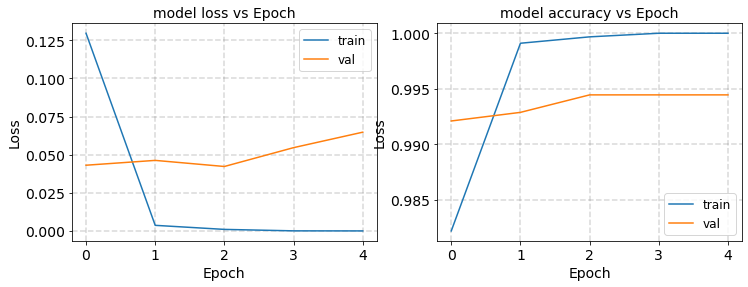

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0947 - accuracy: 0.9873 - val_loss: 0.0872 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0975 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.1132 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0883 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 2.6674e-05 - accuracy: 1.0000 - val_loss: 0.1045 - val_accuracy: 0.9866


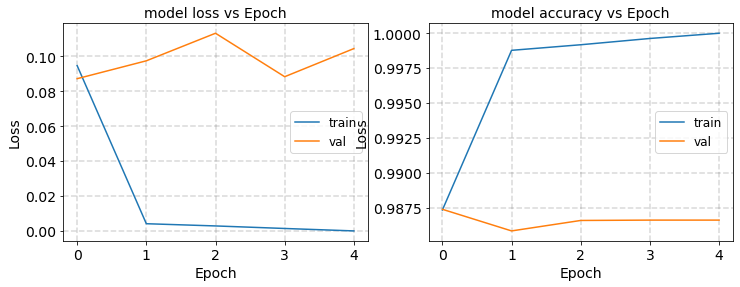

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0690 - accuracy: 0.9849 - val_loss: 0.0611 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0704 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 4.5659e-05 - accuracy: 1.0000 - val_loss: 0.0836 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 1.4621e-05 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 6.0769e-06 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.9850


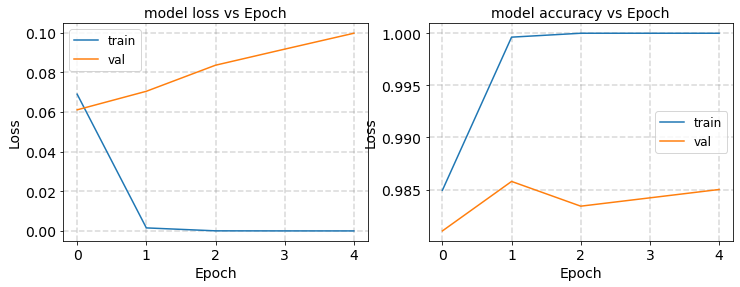

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1404 - accuracy: 0.9714 - val_loss: 0.0853 - val_accuracy: 0.9778
Epoch 2/5
1250/1250 - 3s - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0816 - val_accuracy: 0.9810
Epoch 3/5
1250/1250 - 3s - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.1147 - val_accuracy: 0.9857
Epoch 4/5
1250/1250 - 3s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1318 - val_accuracy: 0.9857
Epoch 5/5
1250/1250 - 2s - loss: 7.5791e-05 - accuracy: 1.0000 - val_loss: 0.1519 - val_accuracy: 0.9857


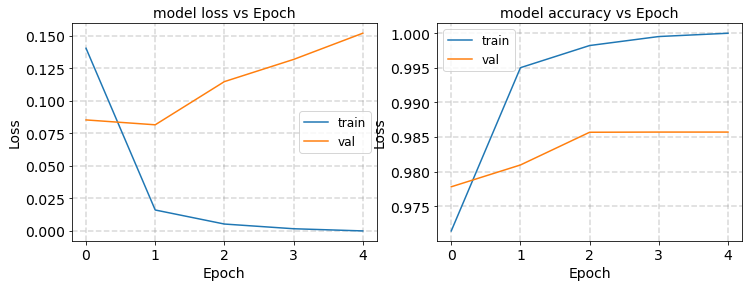

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_49 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_50 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
_______________________________________________

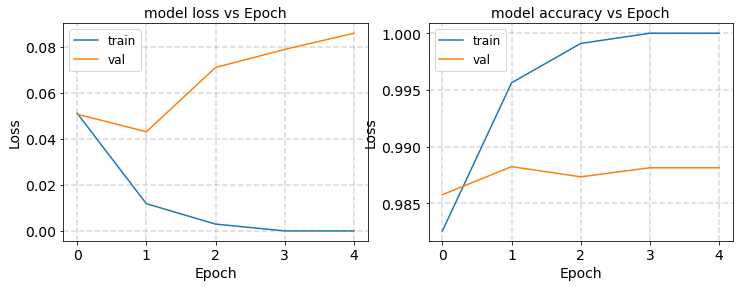

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0625 - accuracy: 0.9863 - val_loss: 0.0340 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 3s - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0430 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0600 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 7.2079e-06 - accuracy: 1.0000 - val_loss: 0.0731 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 1.2463e-06 - accuracy: 1.0000 - val_loss: 0.0804 - val_accuracy: 0.9937


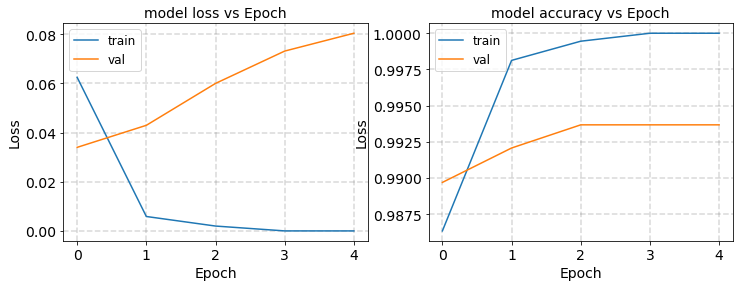

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0925 - accuracy: 0.9804 - val_loss: 0.0640 - val_accuracy: 0.9738
Epoch 2/5
1250/1250 - 4s - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.0698 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 4s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0733 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 7.8243e-05 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 2.4407e-06 - accuracy: 1.0000 - val_loss: 0.1481 - val_accuracy: 0.9842


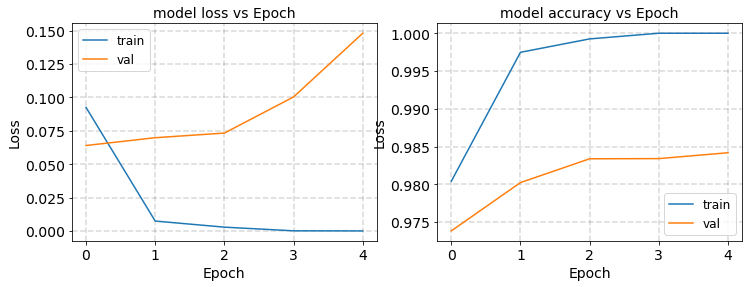

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0765 - accuracy: 0.9873 - val_loss: 0.0328 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0471 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0459 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0738 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0613 - val_accuracy: 0.9922


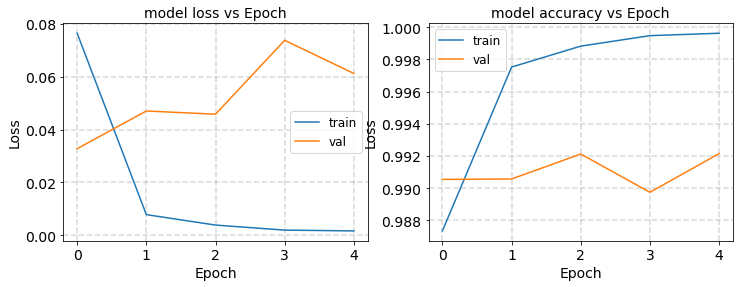

round1 [2 8 3 9]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0780 - accuracy: 0.9850 - val_loss: 0.0559 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0616 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 4.0107e-05 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 4.8202e-06 - accuracy: 1.0000 - val_loss: 0.0914 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 1.0840e-06 - accuracy: 1.0000 - val_loss: 0.1009 - val_accuracy: 0.9882


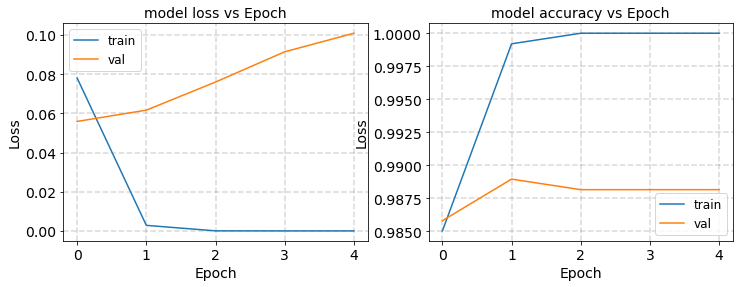

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0997 - accuracy: 0.9811 - val_loss: 0.0597 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0778 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 3s - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0713 - val_accuracy: 0.9857
Epoch 4/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0650 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1037 - val_accuracy: 0.9858


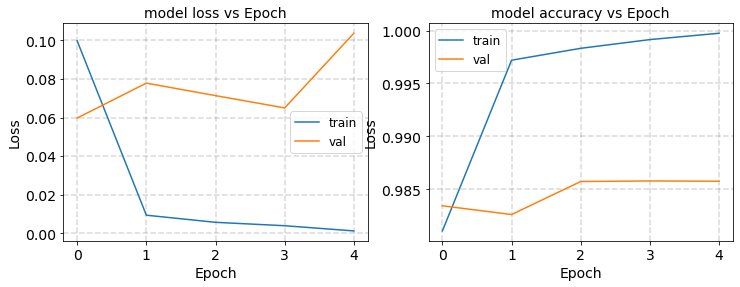

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1219 - accuracy: 0.9712 - val_loss: 0.0676 - val_accuracy: 0.9857
Epoch 2/5
1250/1250 - 3s - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.1071 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1455 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.1041 - val_accuracy: 0.9810
Epoch 5/5
1250/1250 - 3s - loss: 4.9963e-04 - accuracy: 0.9998 - val_loss: 0.1294 - val_accuracy: 0.9818


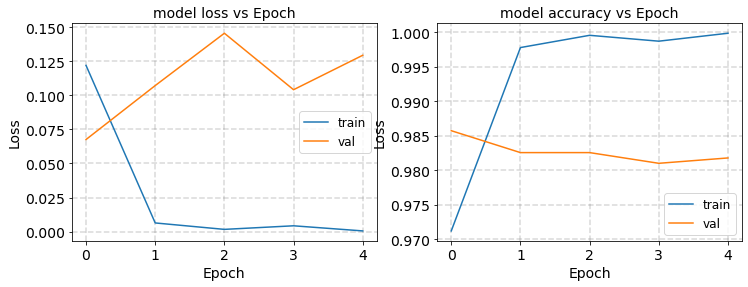

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0772 - accuracy: 0.9875 - val_loss: 0.0471 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9986 - val_loss: 0.0940 - val_accuracy: 0.9836
Epoch 3/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0681 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 1.1948e-05 - accuracy: 1.0000 - val_loss: 0.0831 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 2.2625e-06 - accuracy: 1.0000 - val_loss: 0.0926 - val_accuracy: 0.9937


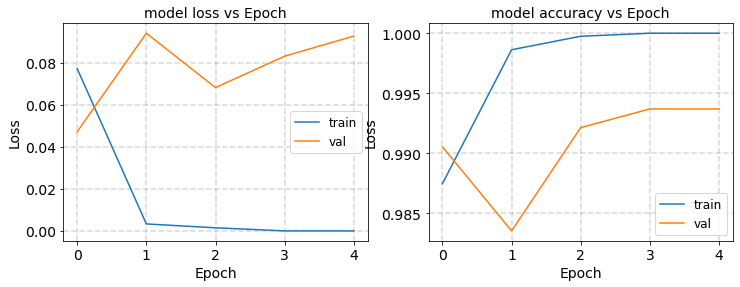

round2 [8 3 9 2]
8
Epoch 1/5
1250/1250 - 3s - loss: 0.1104 - accuracy: 0.9837 - val_loss: 0.0575 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 3s - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0864 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0826 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 4.3697e-04 - accuracy: 0.9999 - val_loss: 0.1236 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 3s - loss: 2.0120e-05 - accuracy: 1.0000 - val_loss: 0.1346 - val_accuracy: 0.9803


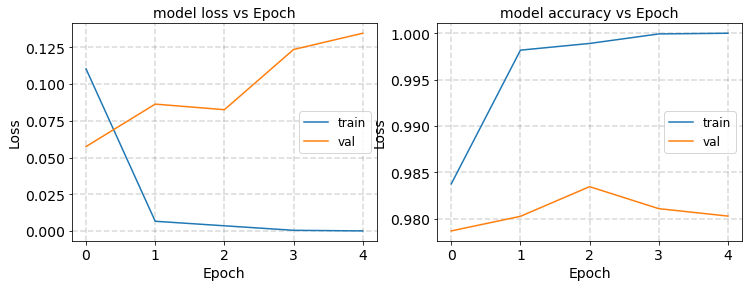

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1447 - accuracy: 0.9785 - val_loss: 0.0781 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 3s - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.1153 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 3s - loss: 2.2337e-04 - accuracy: 1.0000 - val_loss: 0.1409 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 3s - loss: 2.5566e-05 - accuracy: 1.0000 - val_loss: 0.1667 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 7.7290e-06 - accuracy: 1.0000 - val_loss: 0.1849 - val_accuracy: 0.9850


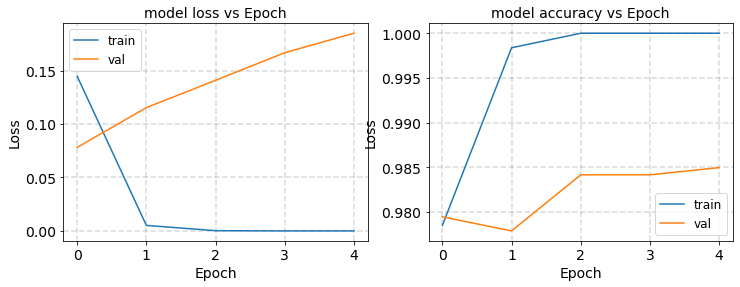

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0881 - accuracy: 0.9870 - val_loss: 0.0387 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0643 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 4.8815e-04 - accuracy: 0.9999 - val_loss: 0.0545 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 1.6218e-05 - accuracy: 1.0000 - val_loss: 0.0666 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 5.3404e-06 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 0.9921


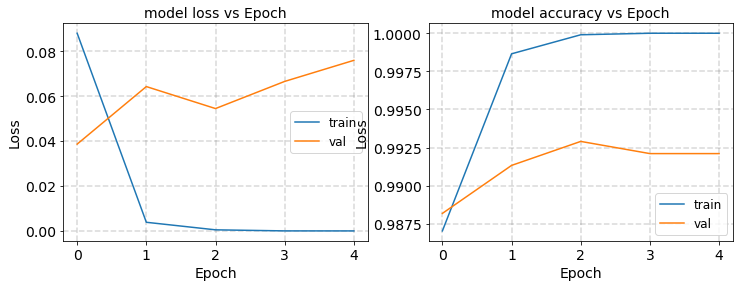

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1113 - accuracy: 0.9896 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0502 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 8.2476e-05 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 1.7456e-05 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 2.9910e-06 - accuracy: 1.0000 - val_loss: 0.0962 - val_accuracy: 0.9913


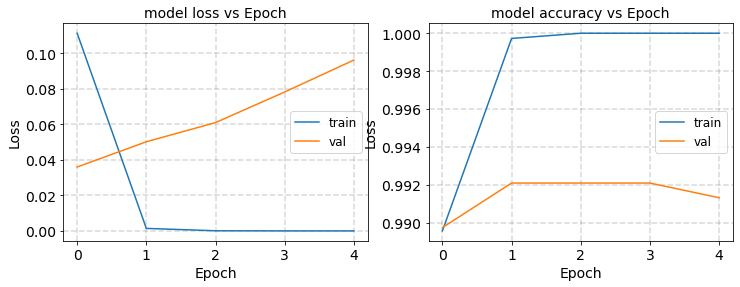

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_55 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_56 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_57 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
_______________________________________________

In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_seq_prune_0_4_128_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=128,
                                  num_output_nodes=4,
                                  pruning=None,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_0_4_128_run0  2.05074         2.04722      0.0187572   
2389_seq_prune_0_4_128_run1  2.04002          2.0566      0.0219423   
2389_seq_prune_0_4_128_run2  2.03471         2.00961      0.0154476   
2389_seq_prune_0_4_128_run3  2.06237         2.05015      0.0194014   
2389_seq_prune_0_4_128_run4  1.98483         1.98969      0.0150663   
2389_seq_prune_0_4_128_run5  1.99377         1.95622      0.0167036   
2389_seq_prune_0_4_128_run6  1.96298         2.00019       0.017409   
2389_seq_prune_0_4_128_run7  2.10383         2.05703      0.0254051   
2389_seq_prune_0_4_128_run8  2.09645         2.07618      0.0205084   
2389_seq_prune_0_4_128_run9  1.92609         1.95277      0.0138984   

                            Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_0_4_128_run0     0.00419425         55     0.9           No   
2389_seq_prune_0_4_128_run1     0.00490645         25     0.5           No   
2389_seq_prune_0_4_128_run2     0.00345418        100       0          Yes   
2389_seq_prune_0_4_128_run3     0.00433829         85     0.3           No   
2389_seq_prune_0_4_128_run4     0.00336892         30     0.6           No   
2389_seq_prune_0_4_128_run5     0.00373503        100       0          Yes   
2389_seq_prune_0_4_128_run6     0.00389278          5     0.1           No   
2389_seq_prune_0_4_128_run7     0.00568075         95     0.1           No   
2389_seq_prune_0_4_128_run8     0.00458582         75     0.5           No   
2389_seq_prune_0_4_128_run9     0.00310778          0       0          Yes   

                            Direction  Accuracy  
2389_seq_prune_0_4_128_run0    larger   0.90145  
2389_seq_prune_0_4_128_run1   smaller   0.94475  
2389_seq_prune_0_4_128_run2    larger    0.9346  
2389_seq_prune_0_4_128_run3    larger  0.829475  
2389_seq_prune_0_4_128_run4   smaller   0.83565  
2389_seq_prune_0_4_128_run5    larger  0.887625  
2389_seq_prune_0_4_128_run6   smaller  0.869775  
2389_seq_prune_0_4_128_run7    larger  0.950425  
2389_seq_prune_0_4_128_run8    larger  0.952625  
2389_seq_prune_0_4_128_run9   smaller     0.922

#### Save dataframe

In [6]:
import pickle

with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_0_4_128_run0  2.05074         2.04722      0.0187572   
2389_seq_prune_0_4_128_run1  2.04002          2.0566      0.0219423   
2389_seq_prune_0_4_128_run2  2.03471         2.00961      0.0154476   
2389_seq_prune_0_4_128_run3  2.06237         2.05015      0.0194014   
2389_seq_prune_0_4_128_run4  1.98483         1.98969      0.0150663   
2389_seq_prune_0_4_128_run5  1.99377         1.95622      0.0167036   
2389_seq_prune_0_4_128_run6  1.96298         2.00019       0.017409   
2389_seq_prune_0_4_128_run7  2.10383         2.05703      0.0254051   
2389_seq_prune_0_4_128_run8  2.09645         2.07618      0.0205084   
2389_seq_prune_0_4_128_run9  1.92609         1.95277      0.0138984   

                            Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_0_4_128_run0     0.00419425         55     0.9           No   
2389_seq_prune_0_4_128_run1     0.00490645         25     0.5           No   
2389_seq_prune_0_4_128_run2     0.00345418        100       0          Yes   
2389_seq_prune_0_4_128_run3     0.00433829         85     0.3           No   
2389_seq_prune_0_4_128_run4     0.00336892         30     0.6           No   
2389_seq_prune_0_4_128_run5     0.00373503        100       0          Yes   
2389_seq_prune_0_4_128_run6     0.00389278          5     0.1           No   
2389_seq_prune_0_4_128_run7     0.00568075         95     0.1           No   
2389_seq_prune_0_4_128_run8     0.00458582         75     0.5           No   
2389_seq_prune_0_4_128_run9     0.00310778          0       0          Yes   

                            Direction  Accuracy  
2389_seq_prune_0_4_128_run0    larger   0.90145  
2389_seq_prune_0_4_128_run1   smaller   0.94475  
2389_seq_prune_0_4_128_run2    larger    0.9346  
2389_seq_prune_0_4_128_run3    larger  0.829475  
2389_seq_prune_0_4_128_run4   smaller   0.83565  
2389_seq_prune_0_4_128_run5    larger  0.887625  
2389_seq_prune_0_4_128_run6   smaller  0.869775  
2389_seq_prune_0_4_128_run7    larger  0.950425  
2389_seq_prune_0_4_128_run8    larger  0.952625  
2389_seq_prune_0_4_128_run9   smaller     0.922

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.01064173,  0.04089681,  0.02843722, ...,  0.01766407,
         0.06107817, -0.01026206],
       [ 0.0274202 , -0.03803486, -0.06670555, ..., -0.01931316,
         0.05169628, -0.07891098],
       [-0.0227231 , -0.08013217,  0.03046805, ...,  0.07482489,
        -0.02868885,  0.01874371],
       ...,
       [ 0.01867075,  0.04561695, -0.03781862, ..., -0.03479231,
         0.06926028, -0.04176725],
       [-0.0545155 , -0.0700458 ,  0.01084871, ..., -0.029224  ,
         0.02225492,  0.00464752],
       [ 0.00444597,  0.0474635 , -0.07911015, ..., -0.07587815,
        -0.07693186,  0.00683189]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

2.050736519286631
2.0472163833808987
0.018757243999078126
0.004194247265248869
55.0
0.9
No
larger
0.901449978351593
